# FINAL PROJECT - INTERCONNECT ML

## 1 Introducción

### 1.1 Descripción del Proyecto

Al operador de telecomunicaciones `Interconnect` le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

**Servicios de Interconnect**

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### 1.2 Descripción de los Datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

### 1.3 Objetivos del Proyecto

Este proyecto tiene tres objetivos principales:

- Analizar los datos proporcionados para identificar los factores que pueden influir en la tasa de cancelación de clientes.
- Desarrollar modelos de aprendizaje automático que puedan predecir de manera eficiente la probabilidad de que los clientes abandonen los servicios de interconexión.
- Generar recomendaciones promocionales para reducir la cancelación de contratos de los clientes y mantener su lealtad al servicio.

### 1.4 Etapas del Proyecto

Este proyecto se llevará a cabo en cuatro fases:

1. Preprocesamiento de datos: Mejorar la calidad de los datos para facilitar un análisis más efectivo.
2. Análisis exploratorio de datos: Investigar los factores que influyen en la tasa de deserción de clientes.
3. Modelado de aprendizaje automático: Desarrollar un modelo de aprendizaje automático capaz de predecir con precisión la tasa de deserción.
4. Informe final y recomendaciones: Resumir la implementación del proyecto y proponer estrategias de promoción adecuadas basadas en los factores clave que contribuyen a la deserción de clientes en los servicios de interconexión.


### 1.5 Aclaración

Característica objetivo: la columna `'EndDate'` es igual a `'No'`.

Métrica principal: AUC-ROC.

Métrica adicional: exactitud.

Criterios de evaluación:

- AUC-ROC < 0.75 — 0 SP
- 0.75 ≤ AUC-ROC < 0.81 — 4 SP
- 0.81 ≤ AUC-ROC < 0.85 — 4.5 SP
- 0.85 ≤ AUC-ROC < 0.87 — 5 SP
- 0.87 ≤ AUC-ROC < 0.88 — 5.5 SP
- AUC-ROC ≥ 0.88 — 6 SP

## 2 Pre-Procesamiento de Datos

### 2.1 Importar Librerías

In [1]:
# Importar librerías requeridas para 'EDA'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import re

import warnings
warnings.filterwarnings('ignore')

print('Importación Exitosa')

Importación Exitosa


### 2.2 Cargar y Leer los Datos

Tenemos cuatro conjuntos de datos para analizar, y los almacenaremos en variables separadas.

In [2]:
# Almacenar csv en diferentes variables
contract = pd.read_csv('contract.csv') 
internet = pd.read_csv('internet.csv') 
personal = pd.read_csv('personal.csv')
phone = pd.read_csv('phone.csv')

In [3]:
# Lista de nombres y tablas
datasets = [('contract', contract), ('internet', internet), ('personal', personal), ('phone', phone)]

# Mostrar la información general de cada dataset
for name, data in datasets:
    print(f"Information of `{name}` dataset:")
    data.info()
    print('=' * 100)


Information of `contract` dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
Information of `internet` dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   Onlin

In [4]:
# Observar una muestra de los datos
tables = {
    'contract': contract,
    'internet': internet,
    'personal': personal,
    'phone': phone
}

for table_name, table_data in tables.items():
    print(f"Data sample `{table_name}`")
    display(table_data.head())
    print('=' * 100)

Data sample `contract`


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Data sample `internet`


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Data sample `personal`


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Data sample `phone`


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [5]:
# Comprobar el tamaño de los cuatro datasets
shapes = [contract, internet, personal, phone]
shape_names = ['contract', 'internet', 'personal', 'phone']

for dataset, name in zip(shapes, shape_names):
    print(f"{name}.shape: {dataset.shape}")

contract.shape: (7043, 8)
internet.shape: (5517, 8)
personal.shape: (7043, 5)
phone.shape: (6361, 2)


**Próximo paso:**

Con base en la información proporcionada, las cuatro tablas tienen una columna llamada `customerID` que funciona como un código único asignado a cada cliente. Para simplificar el análisis, combinaremos estas cuatro tablas en una sola utilizando la columna `customerID`.

Se observa que el tamaño de cada conjunto de datos es diferente, siendo los conjuntos `contract` y `personal` los que tienen más filas. Para conservar todos los datos, utilizaremos el método de unión externa (outer merge).

In [6]:
# Lista de tablas a unir
tables = [contract, internet, personal, phone]

# Unir conjuntos de datos
df = reduce(lambda left, right: pd.merge(left, right, on='customerID', how='outer'), tables)

# Mostrar datos de muestra resultantes de la unión
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,0002-ORFBO,2019-05-01,No,One year,Yes,Mailed check,65.6,593.3,DSL,No,Yes,No,Yes,Yes,No,Female,0,Yes,Yes,No
1,0003-MKNFE,2019-05-01,No,Month-to-month,No,Mailed check,59.9,542.4,DSL,No,No,No,No,No,Yes,Male,0,No,No,Yes
2,0004-TLHLJ,2019-09-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,73.9,280.85,Fiber optic,No,No,Yes,No,No,No,Male,0,No,No,No
3,0011-IGKFF,2018-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,98.0,1237.85,Fiber optic,No,Yes,Yes,No,Yes,Yes,Male,1,Yes,No,No
4,0013-EXCHZ,2019-09-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,83.9,267.4,Fiber optic,No,No,No,Yes,Yes,No,Female,1,Yes,No,No


In [7]:
# Comprobar el tamaño del dataset
df.shape

(7043, 20)

In [8]:
# Comprobar los nombres de las columnas
df.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines'],
      dtype='object')

Aquí tienes una breve descripción del significado de cada columna:

1. `customerID`: El ID único asignado a cada cliente.
2. `BeginDate`: La fecha de inicio del uso del servicio.
3. `EndDate`: La fecha de finalización del uso del servicio.
4. `Type`: El tipo de servicio (mensual/anual/bianual).
5. `PaperlessBilling`: Indica si se utiliza facturación sin papel (sí/no).
6. `PaymentMethod`: El método de pago utilizado por el cliente.
7. `MonthlyCharges`: Los cargos mensuales por el servicio.
8. `TotalCharges`: Los cargos totales por el uso del servicio.
9. `InternetService`: El tipo de servicio de internet utilizado.
10. `OnlineSecurity`: Indica si se incluye seguridad en línea (sí/no).
11. `OnlineBackup`: Indica si se incluye respaldo en línea (sí/no).
12. `DeviceProtection`: Indica si se incluye protección de dispositivos (sí/no).
13. `TechSupport`: Indica si se incluye soporte técnico (sí/no).
14. `StreamingTV`: Indica si se incluye servicio de transmisión de TV (sí/no).
15. `StreamingMovies`: Indica si se incluye servicio de transmisión de películas (sí/no).
16. `gender`: El género del cliente (masculino/femenino).
17. `SeniorCitizen`: Indica si el cliente es un ciudadano mayor (sí/no).
18. `Partner`: Indica si el cliente tiene pareja (sí/no).
19. `Dependents`: Indica si el cliente tiene dependientes (sí/no).
20. `MultipleLines`: Indica si se utilizan múltiples líneas (sí/no).

In [9]:
# Mostrar la información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


In [10]:
# Calcular los valores ausentes de cada columna 
df.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
dtype: int64

In [11]:
# Revisar la descripción de los datos numéricos
df.describe()

,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000
mean,64.761692,0.162147
std,30.090047,0.368612
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,0.000000
max,118.750000,1.000000


In [12]:
# Revisar si existen valores duplicados
df.duplicated().sum()

0

**Hallazgos:**

- Los datos combinados constan de 7043 filas y 20 columnas.
- Algunas columnas de las tablas `internet` y `phone` tienen valores faltantes debido a que estas tablas tienen menos filas.
- El método de escritura de los nombres de las columnas debe ser uniforme para mantener la consistencia.
- No hay valores duplicados en el conjunto de datos.
- La mayoría de las columnas son de tipo objeto, incluyendo `BeginDate` y `EndDate`, que deberían ser de tipo datetime, y `TotalCharges`, que debería ser de tipo float64.
- Solo hay dos columnas numéricas, a saber, `MonthlyCharges` y `SeniorCitizen`.
- La columna `MonthlyCharges` representa los costos mensuales del cliente, con un valor promedio de USD 64.76 por mes y una mediana de USD 70.35.
- La diferencia entre la media y la mediana en la columna `MonthlyCharges` podría indicar la presencia de valores atípicos.
- La columna `SeniorCitizen` contiene solo dos valores: 1 para indicar que el cliente es un ciudadano mayor y 0 para indicar que no lo es.
- Otras columnas que solo contienen 'Yes' y 'No' deberían tener una representación uniforme similar a la columna `SeniorCitizen`.
- La columna `TotalCharges` no tiene el tipo de dato correcto, lo que impide que sus valores se puedan ver en el análisis descriptivo.
- La columna objetivo para el modelado de aprendizaje automático será `EndDate`, que indica el estado del cliente, si sigue activo o si ha desertado.
- Para las necesidades del modelo de clasificación, esta columna objetivo debe reemplazarse con valores binarios, como 0 y 1.

Ahora es momento de mejorar el conjunto de datos existente.

### 2.3 Corregir los Datos

#### 2.3.1 Nombres de Columna Uniformes

In [13]:
# Crear una variable que contenga una lista de nombres de columna
old_columns = ['customerID', 
               'BeginDate', 
               'EndDate', 
               'Type', 
               'PaperlessBilling', 
               'PaymentMethod', 
               'MonthlyCharges', 
               'TotalCharges', 
               'InternetService', 
               'OnlineSecurity', 
               'OnlineBackup', 
               'DeviceProtection', 
               'TechSupport', 
               'StreamingTV', 
               'StreamingMovies', 
               'gender', 
               'SeniorCitizen', 
               'Partner', 
               'Dependents', 
               'MultipleLines'
              ]

# Renombrar la columna
new_columns = []
for column in old_columns:
       
    # Separa palabras con regex excepto ID y TV
    if not column.endswith('ID') and not column.endswith('TV'):
        column = re.sub(r'(?<!^)(?=[A-Z])', '_', column)
    
    new_columns.append(column)

# Cambia todos los nombres de columna a minúsculas
new_columns = [column.lower() for column in new_columns]

df.columns = new_columns

# Verificar el resultado
df.columns

Index(['customerid', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streamingtv', 'streaming_movies',
       'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines'],
      dtype='object')

Todos los nombres de columna se unificaron correctamente.

#### 2.3.2 Cambiar el Tipo de Dato

Las columnas con el tipo de dato que necesitan ser cambiadas son las siguientes:

- `begin_date` y `end_date` deben ser convertidas de tipo objeto a tipo datetime.
- `total_charges` debe ser convertida de tipo objeto a tipo float.
- Las columnas categóricas con valores 'Yes' y 'No' deben ser convertidas a 1 y 0, respectivamente. Esto se aplica a las columnas como `online_security`, `online_backup`, `device_protection`, `tech_support`, `streamingtv`, `streaming_movies`, `partner`, `dependents` y `multiple_lines`.

**Las columnas `begin_date` y `end_date`**

In [14]:
# Verificar valores únicos en begin_date
df['begin_date'].unique()

array(['2019-05-01', '2019-09-01', '2018-12-01', '2014-03-01',
       '2014-11-01', '2019-07-01', '2014-09-01', '2015-08-01',
       '2014-02-01', '2015-06-01', '2017-04-01', '2020-01-01',
       '2016-03-01', '2019-10-01', '2015-12-01', '2018-10-01',
       '2018-03-01', '2019-11-01', '2015-07-01', '2017-12-01',
       '2014-05-01', '2017-01-01', '2016-01-01', '2014-08-01',
       '2014-07-01', '2018-06-01', '2016-07-01', '2015-03-01',
       '2019-02-01', '2017-11-01', '2018-01-01', '2017-09-01',
       '2017-03-01', '2014-10-01', '2016-11-01', '2016-10-01',
       '2016-09-01', '2019-08-01', '2017-08-01', '2014-04-01',
       '2015-05-01', '2015-04-01', '2017-06-01', '2015-10-01',
       '2017-05-01', '2019-04-01', '2018-02-01', '2015-01-01',
       '2018-07-01', '2016-06-01', '2018-11-01', '2019-12-01',
       '2014-12-01', '2019-03-01', '2019-06-01', '2014-01-01',
       '2016-04-01', '2018-08-01', '2018-04-01', '2015-02-01',
       '2016-02-01', '2017-07-01', '2019-01-01', '2015-

In [15]:
# Verificar valores únicos en end_date
df['end_date'].unique()

array(['No', '2020-01-01 00:00:00', '2019-12-01 00:00:00',
       '2019-11-01 00:00:00', '2019-10-01 00:00:00'], dtype=object)

Los datos de fecha en ambas columnas comienzan con el día 01, y la información de la hora no es relevante. Extraeremos únicamente el mes y el año de estas columnas.

La columna `end_date` contiene significativamente menos valores. Esta columna solo indica si el suscriptor sigue activo o ha desertado.

Convertiremos la columna `end_date` en una columna `churn` con valores 0 y 1. Un valor de 0 significa que el cliente sigue activo, mientras que un valor de 1 significa que el cliente ha desertado. Tomamos esta decisión porque la columna `end_date` tiene solo 5 valores únicos, que representan 4 meses diferentes, desde octubre de 2019 hasta enero de 2020, mientras que la columna `begin_date` contiene datos de clientes que comienzan desde octubre de 2013 hasta febrero de 2020. Por lo tanto, eliminaremos la columna `end_date` del conjunto de datos.

In [16]:
# Cambia el tipo de dato de la columna begin_date a datetime
df['begin_date'] = df['begin_date'].apply(pd.to_datetime).dt.to_period('M')

In [17]:
# Comprobar el resultado
df['begin_date'].head()

0    2019-05
1    2019-05
2    2019-09
3    2018-12
4    2019-09
Name: begin_date, dtype: period[M]

In [18]:
# Cambiar la columna end_date a 'churn'
# El valor 'No' se cambia a 0 (activo), mientras que los demás valores se cambian a 1 (cancelación)
df['churn'] = df['end_date'].apply(lambda x: 0 if x == 'No' else 1)
df = df.drop('end_date', axis=1)

In [19]:
# Verificar el resultado
df['churn'].head()

0    0
1    0
2    1
3    1
4    1
Name: churn, dtype: int64

Los datos y su tipo se han cambiado exitosamente.

**Columna `total_charges`**

In [20]:
# Comprobar valores únicos en 'total_charges' 
df['total_charges'].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

No parece haber ningún problema. Convertiremos los datos a un formato numérico.

In [21]:
# Cambiar el tipo de datos de 'total_charges' a valor numérico
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

In [22]:
# Comprobar el resultado
df['total_charges'].head()

0     593.30
1     542.40
2     280.85
3    1237.85
4     267.40
Name: total_charges, dtype: float64

El tipo de dato se ha cambiado exitosamente a float64.

**Las columnas categóricas contienen `Yes` y `No`**

Tenemos varias columnas categóricas que actualmente contienen solo valores 'Yes' y 'No'. Para simplificar el proceso de análisis, convertiremos estos valores categóricos a binarios, donde 1 representa 'Yes' y 0 representa 'No'.

Las columnas que convertiremos son: `online_security`, `online_backup`, `device_protection`, `tech_support`, `streamingtv`, `streaming_movies`, `partner`, `dependents` y `multiple_lines`.

In [23]:
# Verifica los valores únicos para cada columna, excluyendo 'partner', 'dependents' y 'paperless_billing' 
unique_values = pd.DataFrame({
    'online_security': df['online_security'].unique(),
    'online_backup': df['online_backup'].unique(),
    'device_protection': df['device_protection'].unique(),
    'tech_support': df['tech_support'].unique(),
    'streamingtv': df['streamingtv'].unique(),
    'streaming_movies': df['streaming_movies'].unique(),
    'multiple_lines': df['multiple_lines'].unique()
})

unique_values.T

,0,1,2
online_security,No,Yes,NaN
online_backup,Yes,No,NaN
device_protection,No,Yes,NaN
tech_support,Yes,No,NaN
streamingtv,Yes,No,NaN
streaming_movies,No,Yes,NaN
multiple_lines,No,Yes,NaN


In [24]:
# Verifica los valores únicos de las columnas 'partner', 'dependents' y 'paperless_billing'
unique_values_2 = pd.DataFrame({
    'partner': df['partner'].unique(),
    'dependents': df['dependents'].unique(),
    'paperless_billing': df['paperless_billing'].unique()
}).T
unique_values_2

,0,1
partner,Yes,No
dependents,Yes,No
paperless_billing,Yes,No


Anteriormente, observamos que los valores `NaN` aparecieron porque el conjunto de datos inicial, específicamente el conjunto de datos `internet`, solo contiene información de clientes que usan servicios de internet. Por lo tanto, los clientes que no usan servicios de internet (NaN) pueden ser tratados como si tuvieran el mismo valor que 'No'.

Para simplificar el análisis, convertiremos todos los valores `Yes` a 1, mientras que los valores `No` y `NaN` los convertiremos a 0. Esto facilitará el manejo de las columnas categóricas en el conjunto de datos.

- 0 = 'NO' & 'NaN'
- 1 = 'YES'

In [25]:
# Cambiar el valor en la columna categórica de 'Yes' a 1 y de 'No'/NaN a 0
# Cambiar el tipo de dato de objeto a entero

# Crear una lista de columnas cuyos valores serán cambiados
cols_to_convert = ['online_security', 
                   'online_backup', 
                   'device_protection', 
                   'tech_support', 
                   'streamingtv', 
                   'streaming_movies', 
                   'partner', 
                   'dependents', 
                   'multiple_lines',
                   'paperless_billing'
]

# Cambiar los valores en todas estas columnas
df[cols_to_convert] = df[cols_to_convert].replace({'Yes': 1, 'No': 0, np.nan: 0})

# Cambiar el tipo de columna a entero
df[cols_to_convert] = df[cols_to_convert].astype(int)

# Mostrar los datos resultantes de los cambios
df[cols_to_convert].head()

,online_security,online_backup,device_protection,tech_support,streamingtv,streaming_movies,partner,dependents,multiple_lines,paperless_billing
0,0,1,0,1,1,0,1,1,0,1
1,0,0,0,0,0,1,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1
3,0,1,1,0,1,1,1,0,0,1
4,0,0,0,1,1,0,1,0,0,1


In [26]:
# Revisar nuevamente el tipo de todos los datos
df.dtypes

customerid              object
begin_date           period[M]
type                    object
paperless_billing        int32
payment_method          object
monthly_charges        float64
total_charges          float64
internet_service        object
online_security          int32
online_backup            int32
device_protection        int32
tech_support             int32
streamingtv              int32
streaming_movies         int32
gender                  object
senior_citizen           int64
partner                  int32
dependents               int32
multiple_lines           int32
churn                    int64
dtype: object

In [27]:
# Revisar el contenido de los datos
df.head()

,customerid,begin_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streamingtv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,churn
0,0002-ORFBO,2019-05,One year,1,Mailed check,65.6,593.30,DSL,0,1,0,1,1,0,Female,0,1,1,0,0
1,0003-MKNFE,2019-05,Month-to-month,0,Mailed check,59.9,542.40,DSL,0,0,0,0,0,1,Male,0,0,0,1,0
2,0004-TLHLJ,2019-09,Month-to-month,1,Electronic check,73.9,280.85,Fiber optic,0,0,1,0,0,0,Male,0,0,0,0,1
3,0011-IGKFF,2018-12,Month-to-month,1,Electronic check,98.0,1237.85,Fiber optic,0,1,1,0,1,1,Male,1,1,0,0,1
4,0013-EXCHZ,2019-09,Month-to-month,1,Mailed check,83.9,267.40,Fiber optic,0,0,0,1,1,0,Female,1,1,0,0,1


Todos los tipos de datos han sido ajustados, y las columnas que contenían los valores 'Yes' y 'No' también han sido cambiadas a 1 y 0.

#### 2.3.3 Llenado de Valores Ausentes

La mayoría de los valores faltantes se resolvieron durante el proceso de cambio de tipo de columna y conversión de los valores 'Yes' y 'No'. Ahora, revisemos las columnas que aún tienen valores faltantes.

In [28]:
# Verificar valores ausentes
df.isna().sum()

customerid              0
begin_date              0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
internet_service     1526
online_security         0
online_backup           0
device_protection       0
tech_support            0
streamingtv             0
streaming_movies        0
gender                  0
senior_citizen          0
partner                 0
dependents              0
multiple_lines          0
churn                   0
dtype: int64

Después de los pasos de preprocesamiento de datos, solo dos columnas, `internet_service` y `total_charges`, todavía tienen valores faltantes.

In [29]:
# Revisar los valores únicos de la columna 'internet_service'
df['internet_service'].unique()

array(['DSL', 'Fiber optic', nan], dtype=object)

In [30]:
# Verificar el número de valores únicos en la columna 'total_charges'
df['total_charges'].nunique()

6530

In [31]:
# Comprobar si hay valores faltantes en la columna 'total_charges'
df[df['total_charges'].isnull()]

,customerid,begin_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streamingtv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,churn
945,1371-DWPAZ,2020-02,Two year,0,Credit card (automatic),56.05,NaN,DSL,1,1,1,1,1,0,Female,0,1,1,0,0
1731,2520-SGTTA,2020-02,Two year,0,Mailed check,20.00,NaN,NaN,0,0,0,0,0,0,Female,0,1,1,0,0
1906,2775-SEFEE,2020-02,Two year,1,Bank transfer (automatic),61.90,NaN,DSL,1,1,0,1,0,0,Male,0,0,1,1,0
2025,2923-ARZLG,2020-02,One year,1,Mailed check,19.70,NaN,NaN,0,0,0,0,0,0,Male,0,1,1,0,0
2176,3115-CZMZD,2020-02,Two year,0,Mailed check,20.25,NaN,NaN,0,0,0,0,0,0,Male,0,0,1,0,0
2250,3213-VVOLG,2020-02,Two year,0,Mailed check,25.35,NaN,NaN,0,0,0,0,0,0,Male,0,1,1,1,0
2855,4075-WKNIU,2020-02,Two year,0,Mailed check,73.35,NaN,DSL,0,1,1,1,1,0,Female,0,1,1,1,0
3052,4367-NUYAO,2020-02,Two year,0,Mailed check,25.75,NaN,NaN,0,0,0,0,0,0,Male,0,1,1,1,0
3118,4472-LVYGI,2020-02,Two year,1,Bank transfer (automatic),52.55,NaN,DSL,1,0,1,1,1,0,Female,0,1,1,0,0
4054,5709-LVOEQ,2020-02,Two year,0,Mailed check,80.85,NaN,DSL,1,1,1,0,1,1,Female,0,1,1,0,0


**Pasos para completar:**

**Para la columna `internet_service`:**
- La columna `internet_service` tiene solo tres valores únicos: 'DSL', 'Fiber optic' y NaN.
- El valor NaN en la columna `internet_service` aparece debido al proceso de fusión del conjunto de datos `internet`.
- En otras palabras, el valor NaN indica que el cliente no utiliza servicios de internet.
- Por lo tanto, el valor NaN en la columna `internet_service` puede ser reemplazado por 'no internet'.

**Para la columna `total_charges`:**
- Hay solo unos pocos valores NaN, específicamente en 11 filas.
- Estas filas pueden ser eliminadas de manera segura sin afectar significativamente la calidad general del conjunto de datos.

In [32]:
# Reemplazar el valor 'NaN' en la columna 'internet_service' por 'No internet'
df['internet_service'] = df['internet_service'].fillna('No internet')

In [33]:
# Eliminar las filas con valores 'NaN' en la columna 'total_charges'
df.dropna(subset=['total_charges'], inplace=True)

In [34]:
# Revisar nuevamente si hay valores ausentes
df.isna().sum()

customerid           0
begin_date           0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streamingtv          0
streaming_movies     0
gender               0
senior_citizen       0
partner              0
dependents           0
multiple_lines       0
churn                0
dtype: int64

Ahora, todos los valores ausentes han sido resueltos.

***

## 3 Análisis Exploratorio de Datos (EDA)

En esta sección, realizaremos un análisis exploratorio de datos para examinar qué factores influyen en la *tasa de abandono o cancelación* de los clientes de Interconnect.

Comenzaremos explorando la correlación entre las diferentes columnas y la columna `churn` (tasa de abandono de clientes), que sirve como la variable objetivo.

In [35]:
# Verificar el nivel de correlación de todas las columnas con 'churn'
numeric_df = df.select_dtypes(include=[float, int])

# Calcular la correlación con la columna `churn`
correlation = numeric_df.corr()['churn'].sort_values(ascending=False)

print(correlation)

churn                1.000000
monthly_charges      0.192858
paperless_billing    0.191454
senior_citizen       0.150541
streamingtv          0.063254
streaming_movies     0.060860
multiple_lines       0.040033
device_protection   -0.066193
online_backup       -0.082307
partner             -0.149982
dependents          -0.163128
tech_support        -0.164716
online_security     -0.171270
total_charges       -0.199484
Name: churn, dtype: float64


**Hallazgos**

- En general, existe un nivel relativamente débil de correlación entre todas las columnas y la columna `churn`.

**Correlación Positiva**
- Algunas columnas muestran una correlación positiva moderadamente alta con la columna `churn`, a saber, `monthly_charges`, `paperless_billing` y `senior_citizen`.
- Esto sugiere que mayores `monthly_charges` están asociadas con una mayor probabilidad de cancelación.
- Los clientes que utilizan el método de `paperless_billing` también tienen más probabilidades de experimentar abandono.
- Los ciudadanos mayores, según lo indicado por la columna `senior_citizen`, tienen una mayor probabilidad de cancelar.

**Correlación Negativa**
- Varias columnas muestran una correlación negativa moderadamente fuerte con la columna `churn`, a saber, `total_charges`, `online_security`, `tech_support`, `dependents` y `partner`.
- Un valor más bajo en la columna `total_charges` indica una mayor probabilidad de cancelación.
- Los clientes que no utilizan los servicios de `online_security` y `tech_support` tienden a tener una mayor probabilidad de deserción.
- Los clientes sin dependientes y sin pareja también presentan una mayor probabilidad de cancelación.

Estos hallazgos justifican una investigación y análisis más detallados.

**Preparar Algunas Funciones**

Vamos a iterar varios procesos de análisis en cada columna. Para agilizar esto, definiremos una función personalizada.

In [36]:
# Definir funciones para calcular la distribución de datos y crear gráficos de pastel  
def analyze_column(column):
    # Calcular conteos de porcentajes y valores 
    value_counts = df[column].value_counts()
    percentages = (value_counts / len(df)) * 100

    # Crear un DataFrame
    data = pd.DataFrame({'Value Counts': value_counts, 'Percentages': percentages.map('{:.2f}%'.format)})

    # Mostrar el DataFrame
    display(data)

    # Mostrar un gráfico de pastel
    plt.pie(value_counts, labels=value_counts.index, autopct='%.1f%%')

    # Agregar un título
    plt.title(f'Distribution of {column}')

    # Mostrar el resultado
    plt.show()

In [37]:
# Definir una función para calcular la tasa de cancelación y visualizarla
def analyze_churn_rate(column):
    # Calcular la tasa de cancelación por columna
    churn_rate = df.groupby(column)['churn'].value_counts().unstack(fill_value=0)

    # Agregar la columna 'churn_rate' 
    churn_rate['churn_rate'] = (churn_rate[1] / churn_rate.sum(axis=1) * 100).round(2).astype(str) + '%'
    
    # Crear una visualización de la tasa de cancelación basada en columnas
    churn_rate.plot(kind='bar', stacked=False)

    # Agregar títulos y etiquetas a los ejes
    plt.title('Churn Rate by ' + column)
    plt.xlabel(column)
    plt.ylabel('Count')

    # Mostrar la leyenda
    plt.legend(title='Churn', loc='upper right')
    
    # Establecer la etiqueta del eje x en cursiva
    plt.gca().set_xticklabels(churn_rate.index, rotation=45, ha='right')

    # Mostrar el gráfico
    plt.show()
    
    # Devuelve el DataFrame 'churn_rate'
    return churn_rate

### 3.1 Correlación Positiva

#### 3.1.1 Columna `monthly_charges` 

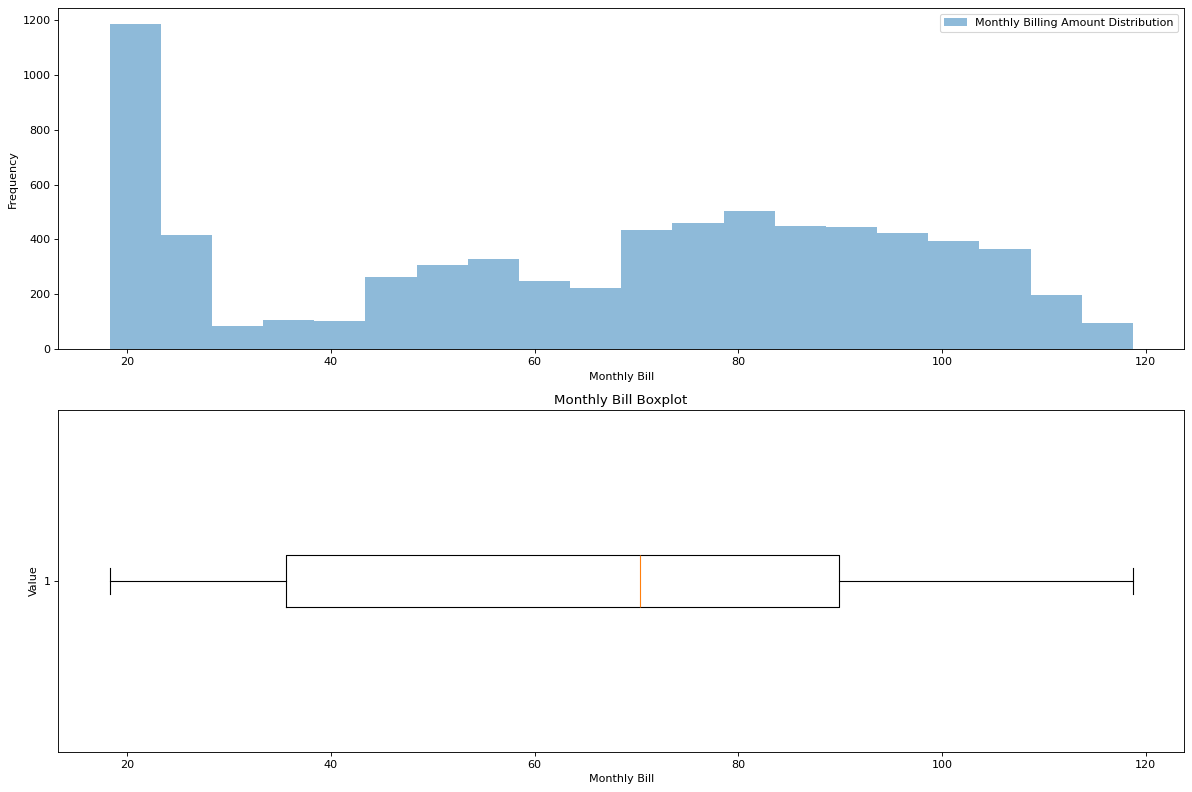

In [38]:
# Visualiza la distribución de la columna 'monthly_charges'
plt.figure(figsize=(15, 10), dpi=80)

# Histograma
plt.subplot(2, 1, 1)
plt.hist(df['monthly_charges'], bins=20, alpha=0.5, label='Monthly Billing Amount Distribution')
plt.xlabel('Monthly Bill')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Boxplot
plt.subplot(2, 1, 2)
plt.boxplot(df['monthly_charges'], vert=False)
plt.xlabel('Monthly Bill')
plt.ylabel('Value')
plt.title('Monthly Bill Boxplot')

plt.tight_layout()
plt.show()

**Hallazgos**

- La distribución de los datos está concentrada en valores de facturación más bajos, principalmente alrededor de USD 20.
- La distribución de los datos mejora para los montos de facturación superiores a USD 70.

Ahora procederemos a crear una nueva columna que agrupe los datos en función de la columna `monthly_charges`.

In [39]:
# Crear una nueva columna llamada 'charge_category' basada en el valor de 'monthly_charges'
df['charge_category'] = pd.cut(df['monthly_charges'], bins=[0, 30, 50, 70, 90, 120], 
                               labels=['low', 'mid low', 'middle', 'mid high', 'high'], right=False)


,Value Counts,Percentages
charge_category,,
mid high,1845,26.24%
high,1744,24.80%
low,1647,23.42%
middle,1155,16.42%
mid low,641,9.12%


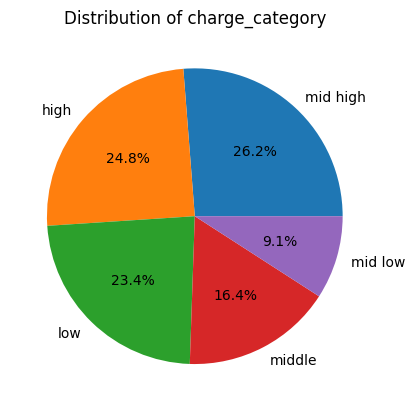

In [40]:
# Calcular la distribución de los valores en la columna 'charge_category'
analyze_column('charge_category')

**Hallazgos:**

La distribución de los datos está concentrada en las categorías de media-alta, alta y baja, mientras que las categorías media y media-baja tienen una representación relativamente baja.

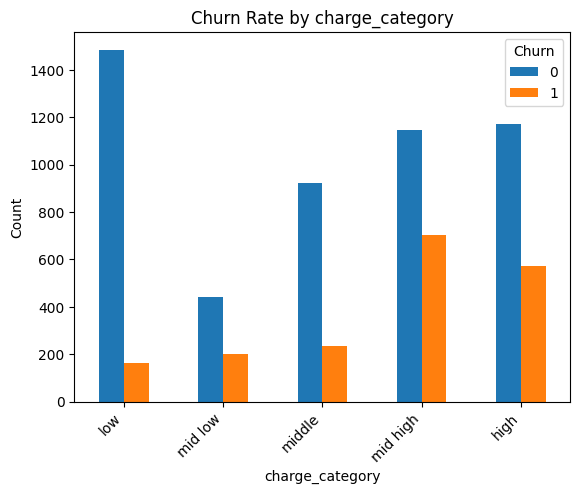

churn,0,1,churn_rate
charge_category,,,
low,1485,162,9.84%
mid low,442,199,31.05%
middle,921,234,20.26%
mid high,1144,701,37.99%
high,1171,573,32.86%


In [41]:
# Calcular la tasa de deserción basada en la columna 'charge_category' y muestra la visualización
monthly_charge_churn_rate = analyze_churn_rate('charge_category')
monthly_charge_churn_rate

**Hallazgos**

- Basado en el análisis de correlación, anteriormente descubrimos que a mayor `monthly_charges`, mayor es la probabilidad de deserción.
- Un análisis más detallado confirma los hallazgos iniciales, ya que las tasas de deserción son más altas para los clientes con tarifas de facturación mensual de **media-alta** (USD 70 - USD 90) y **alta** (USD 90 - USD 120) en comparación con los clientes con tarifas de facturación mensual más bajas.

**Recomendaciones**

- Interconnect debería prestar más atención a los clientes con altas facturas mensuales, ya que tienen una mayor probabilidad de darse de baja.
- Los segmentos **media-alta** y **alta** deberían ser el objetivo principal para los programas de promoción.

#### 3.1.2 Columna `paperless_billing`

En nuestro análisis de correlación inicial, observamos que los clientes con facturas **sin papel**, indicados por un valor de 1 en la columna `paperless_billing`, tienden a tener una mayor probabilidad de abandonar el servicio o **desertar**. Vamos a investigar más a fondo para confirmar este hallazgo.

,Value Counts,Percentages
paperless_billing,,
1,4168,59.27%
0,2864,40.73%


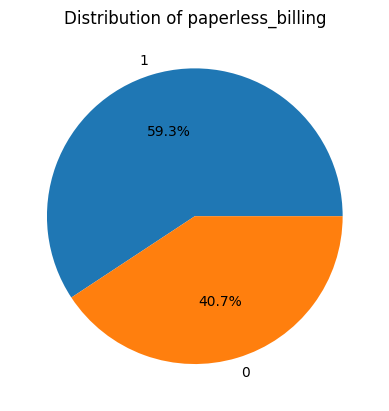

In [42]:
# Calcular la distribución de los valores en la columna 'paperless_billing'
analyze_column('paperless_billing')

Parece que la mayoría de los clientes utilizan el método de facturación **sin papel**, como lo indica el valor de 1 en la columna `paperless_billing`, efectivamente tienen una mayor probabilidad de cancelar su servicio.

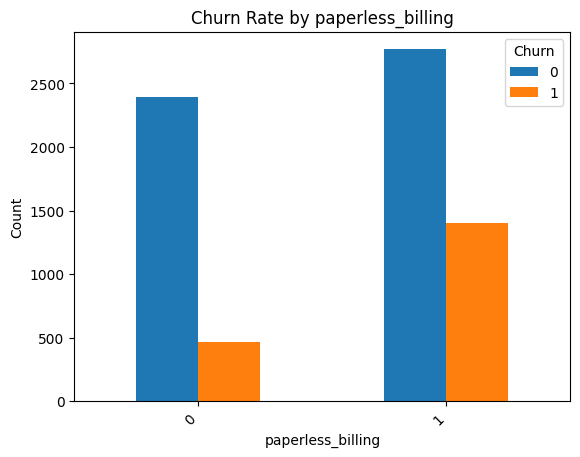

churn,0,1,churn_rate
paperless_billing,,,
0,2395,469,16.38%
1,2768,1400,33.59%


In [43]:
# Calcular la tasa de deserción basada en la columna 'paperless_billing' y muestra la visualización
paperless_churn_rate = analyze_churn_rate('paperless_billing')
paperless_churn_rate

**Hallazgos**

- Los clientes con el método de facturación **sin papel** (1) son evidentemente el doble de propensos a cancelación en comparación con los clientes con un método de facturación **no sin papel** (0).

**Perspectivas**

- Las facturas **sin papel** pueden ser más convenientes para cancelar, ya que se pueden procesar en línea a través de internet.
- Las facturas físicas en forma de recibos de papel pueden crear una barrera para los clientes al intentar cancelar sus suscripciones, ya que requieren procesamiento fuera de línea.

**Recomendaciones**

- Fomentar a los clientes a cambiar a métodos de facturación **no sin papel** puede no ser adecuado en la era digital, pero podría actuar como un disuasivo para los clientes que están considerando abandonar el servicio.
- Los programas promocionales pueden estar dirigidos a los clientes con el método de facturación **sin papel** para incentivar su retención.

#### 3.1.3 Columna `senior_citizen`

Al igual que con las dos columnas anteriores, el análisis de correlación inicial indica que los clientes mayores, o clientes con un valor de 1 en la columna `senior_citizen`, tienen más probabilidades de abandonar el servicio de Interconnect. Vamos a investigar más a fondo para confirmar este hallazgo.

,Value Counts,Percentages
senior_citizen,,
0,5890,83.76%
1,1142,16.24%


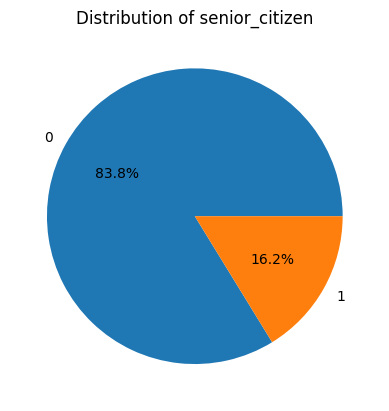

In [44]:
# Calcular la distribución de los valores en la columna 'senior_citizen'
analyze_column('senior_citizen')

Solo el 16.24% de los clientes están clasificados como adultos mayores. Ahora, examinemos la tasa de deserción entre estos clientes mayores.

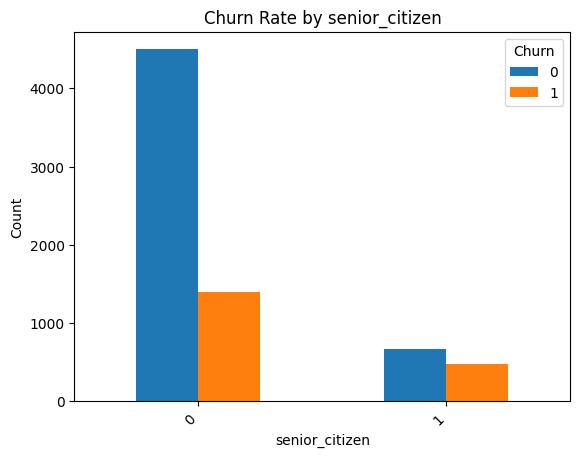

churn,0,1,churn_rate
senior_citizen,,,
0,4497,1393,23.65%
1,666,476,41.68%


In [45]:
# Calcular la tasa de deserción basada en la columna 'senior_citizen' y muestra la visualización
senior_citizen_churn_rate = analyze_churn_rate('senior_citizen')
senior_citizen_churn_rate

**Hallazgos**

- En términos absolutos, hay más clientes no adultos mayores (`senior_citizen` = 0) que han abandonado el servicio, totalizando 1393 clientes.
- Sin embargo, la tasa de abandono para los clientes adultos mayores (`senior_citizen` = 1) es significativamente más alta, alcanzando el 41.68%.
- El número de clientes adultos mayores que han abandonado el servicio es de 476 clientes, pero este número está cerca del número de clientes adultos mayores que han permanecido, que es de 666 clientes.
- Esto indica que los clientes adultos mayores tienen un mayor riesgo de abandonar el servicio.

**Recomendaciones**

- A pesar del número relativamente pequeño de clientes adultos mayores, es crucial no pasarlos por alto.
- Es esencial diseñar programas promocionales adecuados que atiendan las necesidades de los clientes adultos mayores, animándolos a continuar utilizando el servicio.

### 3.2 Correlación Negativa

Ahora, procedamos a analizar las columnas que muestran una correlación negativa significativa con la columna `churn`, como son las columnas: `total_charges`, `online_security`, `tech_support`, `dependents` y `partner`.

#### 3.2.1 Columna `total_charges`

A diferencia de la columna `monthly_charges`, en el análisis de correlación inicial, la columna `total_charges` muestra una correlación negativa con la columna `churn`. Esto indica que a medida que aumenta el valor de `total_charges`, las probabilidades de que el cliente abandone el servicio disminuyen. Vamos a analizar la columna `total_charges` de manera similar a como lo hicimos con la columna `monthly_charges`.

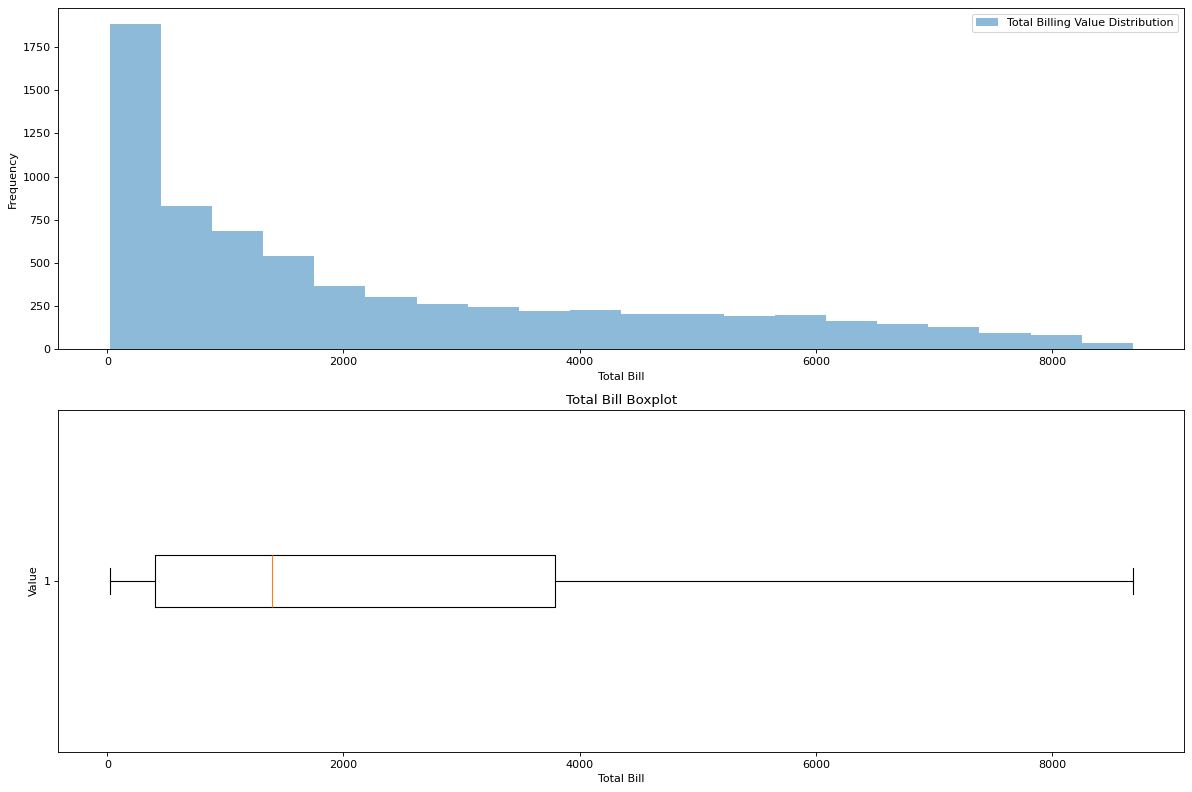

In [46]:
# Visualizar la distribución de la columna 'total_charges'
plt.figure(figsize=(15, 10), dpi=80)

# Histograma
plt.subplot(2, 1, 1)
plt.hist(df['total_charges'], bins=20, alpha=0.5, label='Total Billing Value Distribution')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Boxplot
plt.subplot(2, 1, 2)
plt.boxplot(df['total_charges'], vert=False)
plt.xlabel('Total Bill')
plt.ylabel('Value')
plt.title('Total Bill Boxplot')

plt.tight_layout()
plt.show()

**Hallazgos**

- La distribución de los datos para la columna `total_charges` está sesgada hacia la derecha, lo que indica que la mayoría de los clientes tienen un valor de facturación total bajo.
- La mayoría de los clientes tienen un valor de facturación total por debajo de USD 1000.

De manera similar a los análisis anteriores, procederemos a crear una nueva columna que agrupe los datos en función de la columna `total_charges`.

In [47]:
# Crear una nueva columna llamada 'total_charge_category' basada en el valor de 'total_charges'
df['total_charge_category'] = pd.cut(df['total_charges'], bins=[0, 2000, 4000, 6000, 8000, 10000], 
                               labels=['low', 'mid low', 'middle', 'mid high', 'high'], right=False)

,Value Counts,Percentages
total_charge_category,,
low,4176,59.39%
mid low,1208,17.18%
middle,956,13.59%
mid high,614,8.73%
high,78,1.11%


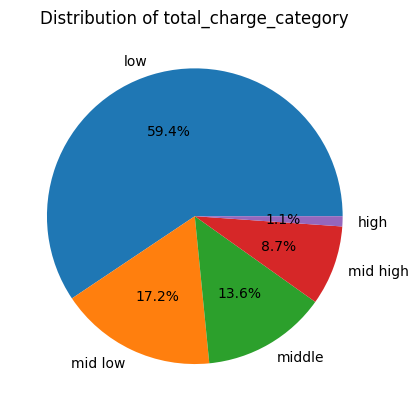

In [48]:
# Calcular la distribución de los valores en la columna 'total_charge_category'
analyze_column('total_charge_category')

La mayoría de los clientes, aproximadamente el 59.4%, se encuentran en la categoría de tener un valor total de factura bajo. Esto indica que una porción significativa de los clientes tiene cargos totales relativamente bajos, lo que podría contribuir a la correlación negativa observada con la columna `churn`.

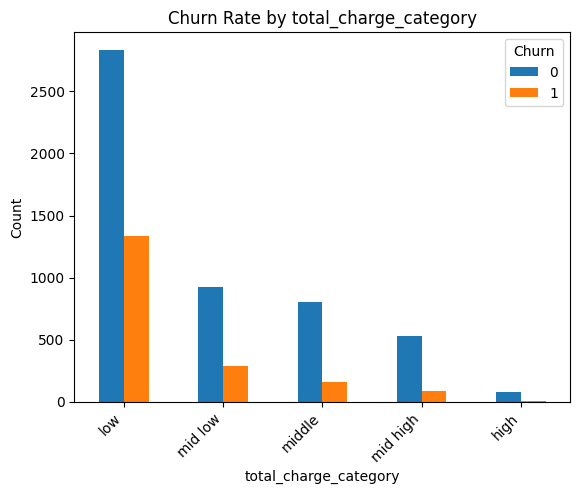

churn,0,1,churn_rate
total_charge_category,,,
low,2837,1339,32.06%
mid low,921,287,23.76%
middle,801,155,16.21%
mid high,529,85,13.84%
high,75,3,3.85%


In [49]:
# Calcular la tasa de deserción basada en la columna 'total_charge_category' y muestra la visualización
total_charge_churn_rate = analyze_churn_rate('total_charge_category')
total_charge_churn_rate

**Hallazgos**

- Como lo indica el análisis de correlación, existe una correlación negativa entre `total_charges` y `churn`, lo que sugiere que valores más bajos de `total_charges` están asociados con una mayor probabilidad de deserción.
- La tasa de deserción es más alta entre los clientes con el valor total de facturación más bajo o **bajo** (USD 0 - USD 2000) en comparación con aquellos con valores totales de facturación más altos.

**Perspectivas**

- La columna `total_charges` representa el monto total pagado por los clientes durante el uso del servicio.
- Los valores más altos en la columna `total_charges` indican duraciones de suscripción más largas y reflejan la lealtad del cliente.
- En consecuencia, los clientes con valores más altos de `total_charges` tienen menos probabilidades de abandonar el servicio.

**Recomendaciones**

- Interconnect debería considerar ofrecer promociones y incentivos dirigidos a clientes que se encuentren en el segmento **bajo** del valor total de facturación para animarlos a pasar a segmentos más altos, fomentando así una mayor lealtad del cliente y reduciendo las tasas de deserción.

#### 3.2.2 Columna `online_security` 

La columna `online_security` contiene valores binarios, 0 y 1, donde 0 indica que los clientes no usan el servicio de **seguridad en línea** y 1 indica que sí lo usan. El análisis de correlación revela que los clientes que utilizan este servicio (1) tienen tasas de **cancelación** más bajas.

,Value Counts,Percentages
online_security,,
0,5017,71.35%
1,2015,28.65%


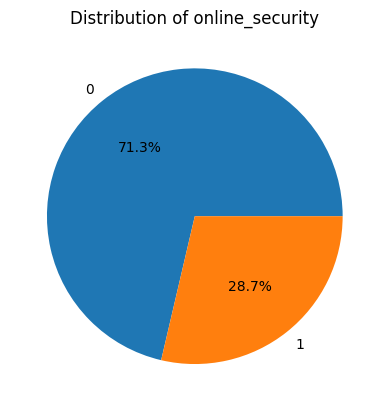

In [50]:
# Calcular la distribución de los valores en la columna 'online_security'
analyze_column('online_security')

La mayoría de los clientes no utilizan los servicios de **seguridad en línea**.

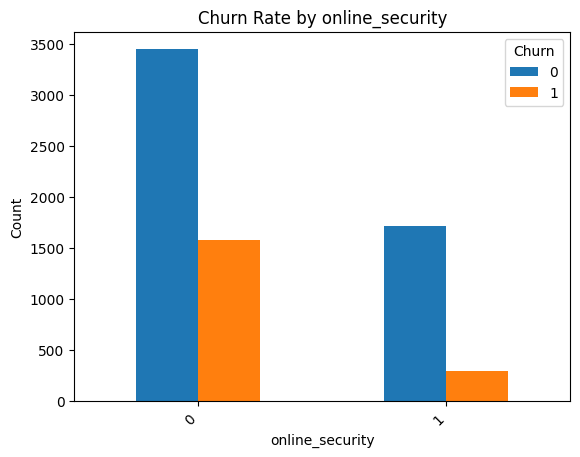

churn,0,1,churn_rate
online_security,,,
0,3443,1574,31.37%
1,1720,295,14.64%


In [51]:
# Calcular la tasa de deserción basada en la columna 'online_security' y muestra la visualización
online_security_churn_rate = analyze_churn_rate('online_security')
online_security_churn_rate

**Hallazgos**

- Los clientes que no utilizan el servicio de **seguridad en línea** tienen una probabilidad significativamente mayor de abandonar el servicio.
- El número de suscriptores que no usaron el servicio de **seguridad en línea** y decidieron cancelar (1574) fue casi el mismo que el número de usuarios del servicio de **seguridad en línea** que eligieron quedarse (1720).
- La probabilidad de que los clientes se den de baja es muy baja cuando han utilizado el servicio de **seguridad en línea**.

**Perspectivas**

- La disponibilidad del servicio de **seguridad en línea** parece desempeñar un papel en la reducción de las tasas de abandono entre los clientes.
- Los clientes que optan por el servicio de **seguridad en línea** probablemente tienen una mayor confianza y seguridad en los servicios ofrecidos por Interconnect, lo que lleva a una menor probabilidad de cancelación.
- Los clientes que priorizan y utilizan el servicio de **seguridad en línea** tienden a mostrar tasas de retención más altas.
- Estos suscriptores probablemente tienen una fuerte preocupación por su seguridad en línea, lo que conduce a una mayor lealtad y una menor probabilidad de cancelación.

**Recomendaciones**

- Enfatiza y promueve los beneficios de los servicios de **seguridad en línea** para atraer a más clientes a utilizar esta función, mejorando así la retención de clientes y reduciendo las tasas de cancelación.

#### 3.2.3 Columna `tech_support` 

La columna `tech_support` también muestra una correlación negativa, similar a la columna `online_security`. Podemos suponer que los clientes que han utilizado estos servicios tienden a ser conscientes de su fiabilidad, lo que podría llevar a una menor tasa de cancelación. Examinaremos más a fondo la tasa de deserción en esta columna.

,Value Counts,Percentages
tech_support,,
0,4992,70.99%
1,2040,29.01%


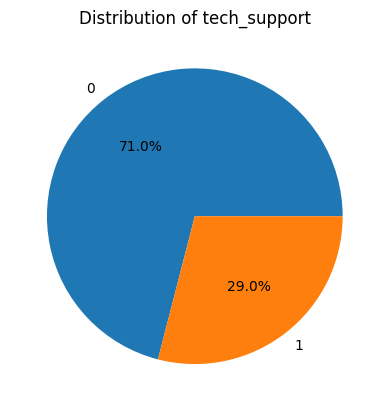

In [52]:
# Calcular la distribución de los valores en la columna 'tech_support'
analyze_column('tech_support')

La mayoría de los clientes no utiliza los servicios de **soporte técnico**, de manera similar a las condiciones para los servicios de **seguridad en línea**.

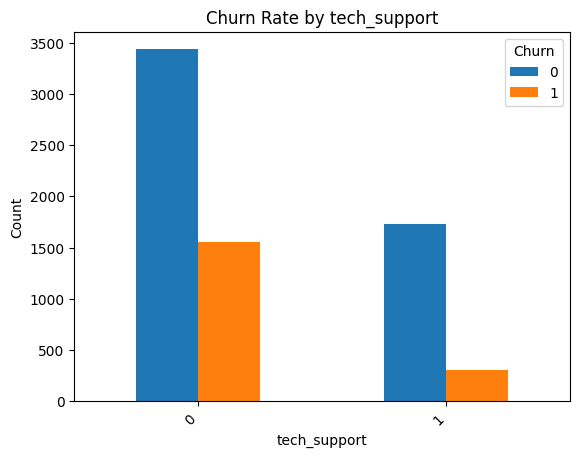

churn,0,1,churn_rate
tech_support,,,
0,3433,1559,31.23%
1,1730,310,15.2%


In [53]:
# Calcular la tasa de deserción basada en la columna 'tech_support' y muestra la visualización
tech_support_churn_rate = analyze_churn_rate('tech_support')
tech_support_churn_rate

**Hallazgos**

- Los clientes que no han utilizado el servicio de **soporte técnico** tienen una mayor probabilidad de abandonar el servicio en comparación con aquellos que sí lo han utilizado.
- El número de suscriptores que no usaron el servicio de **soporte técnico** y decidieron cancelar es casi equivalente al número de usuarios del servicio de **soporte técnico** que eligieron quedarse.

**Perspectivas**

- La disponibilidad de **soporte técnico** puede desempeñar un papel crucial en la retención de clientes. Los clientes que tienen acceso a asistencia técnica son más propensos a sentirse respaldados y satisfechos con los servicios proporcionados.

**Recomendaciones**

- Fortalece la promoción del producto de **soporte técnico** para alentar a más clientes a utilizar este servicio. Al ofrecer asistencia técnica confiable, Interconnect puede mejorar la satisfacción del cliente y reducir la probabilidad de deserción.

#### 3.2.4 Columna `dependents`

Vamos a calcular la tasa de abandono basada en la columna dependents para ver si los clientes que no tienen **dependientes** tienden a cancelar el servicio más fácilmente.

,Value Counts,Percentages
dependents,,
0,4933,70.15%
1,2099,29.85%


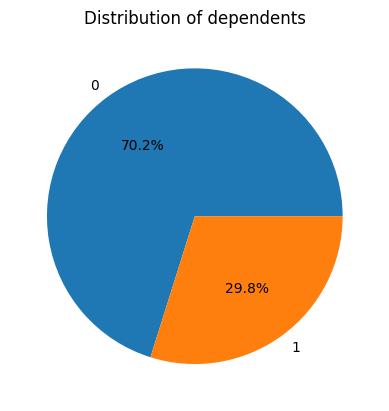

In [54]:
# Calcular la distribución de valores en la columna 'dependents'
analyze_column('dependents')

La mayoría de los clientes no tienen dependientes económicos.

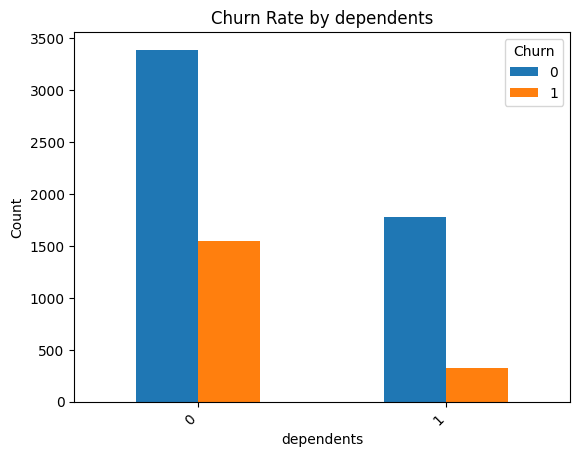

churn,0,1,churn_rate
dependents,,,
0,3390,1543,31.28%
1,1773,326,15.53%


In [55]:
# Calcular la tasa de deserción basada en la columna 'dependents' y muestra la visualización
dependents_churn_rate = analyze_churn_rate('dependents')
dependents_churn_rate

**Hallazgos**

- Los clientes sin dependientes económicos tienden a tener una mayor tasa de abandono, lo que indica que son más propensos a cancelar el servicio en comparación con los clientes con dependientes.

**Perspectivas**

- Los clientes con dependientes pueden tener un compromiso más fuerte con el servicio debido a las necesidades y preferencias familiares, lo que lleva a una menor probabilidad de cancelar la suscripción.

**Recomendaciones**

- Las promociones y ofertas especiales pueden ser diseñadas para clientes con dependientes para mejorar su lealtad y animarles a quedarse con el servicio.
- Incentivar mediante estrategias a los clientes sin dependientes, para abordar sus preocupaciones y necesidades específicas, y motivarlos a que conserven el servicio.

#### 3.2.5 Columna `partner`

A continuación, analicemos la última columna que muestra una correlación negativa con la cancelación, que es la columna `partner`. Observamos que los clientes que tienen pareja tienden a continuar utilizando el servicio, mientras que los clientes que no tienen pareja tienen una mayor posibilidad de cancelar su suscripción. Exploraremos la tasa de deserción basada en esta columna para obtener más información.

,Value Counts,Percentages
partner,,
0,3639,51.75%
1,3393,48.25%


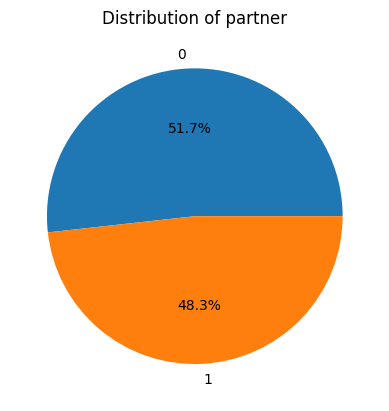

In [56]:
# Calcular la distribución de los valores en la columna 'partner'
analyze_column('partner')

El número de clientes con pareja y sin pareja está prácticamente equilibrado.

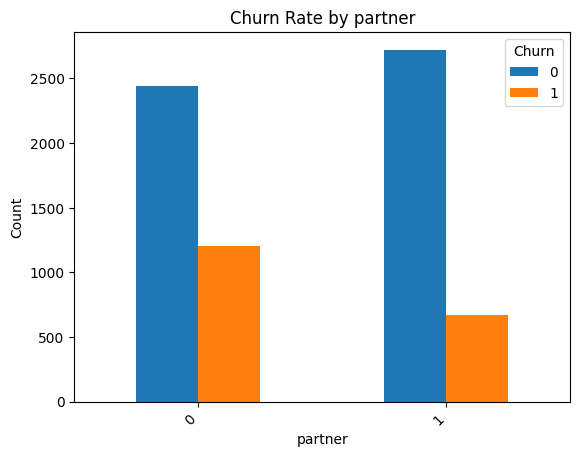

churn,0,1,churn_rate
partner,,,
0,2439,1200,32.98%
1,2724,669,19.72%


In [57]:
# Calcular la tasa de deserción en base a la columna 'partner' y mostrar la visualización
partner_churn_rate = analyze_churn_rate('partner')
partner_churn_rate

**Hallazgos**

- La tasa de abandono para los clientes que no tienen pareja es significativamente más alta, alcanzando el 32.98%, en comparación con los clientes que tienen pareja, con una tasa de cancelación de solo el 19.72%.
- A pesar de tener más filas de datos en total, el número de clientes sobrevivientes que no tienen pareja es en realidad menor que el de aquellos que tienen pareja.

**Perspectivas**

- Tener una pareja parece jugar un papel en la reducción de la probabilidad de que los clientes terminen su suscripción.
- Los clientes sin pareja pueden tener necesidades o experiencias diferentes que conducen a una mayor tasa de abandono.

**Recomendaciones**

- Se pueden diseñar promociones y ofertas específicas para atender las necesidades particulares de los clientes que no tienen pareja con el fin de reducir la tasa de cancelación en este segmento.

### 3.3 Correlación de Características Categóricas

Hasta ahora, nuestro análisis se ha centrado en las características numéricas. Ahora, es el momento de dirigir nuestra atención hacia las características categóricas. Tenemos varias características categóricas que examinar, a saber, `type`, `payment_method`, `internet_service` y `gender`. Vamos a verificar la tasa de cancelación basada en estas características.

#### 3.3.1 Columna `type` 

,Value Counts,Percentages
type,,
Month-to-month,3875,55.11%
Two year,1685,23.96%
One year,1472,20.93%


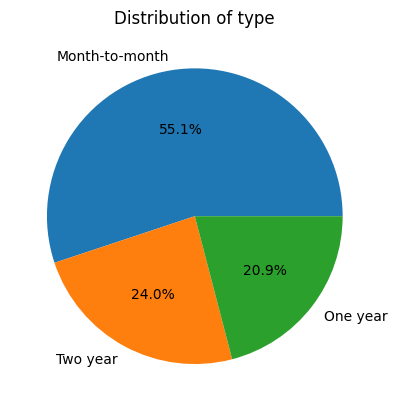

In [58]:
# Calcular la distribución de valores en la columna 'type'
analyze_column('type')

La mayoría de los clientes, alrededor del 55.1%, han optado por un esquema de suscripción mensual.

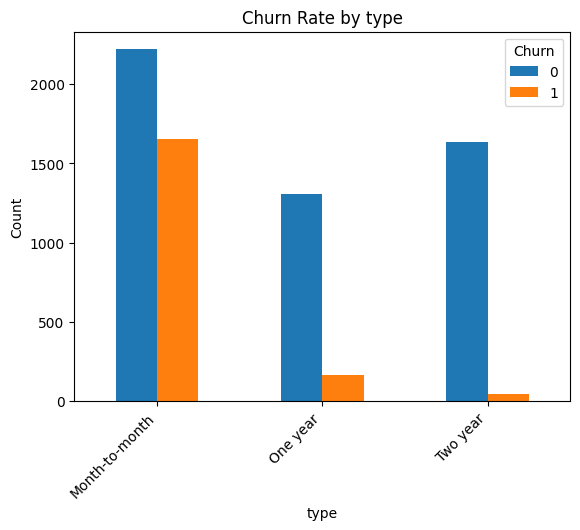

churn,0,1,churn_rate
type,,,
Month-to-month,2220,1655,42.71%
One year,1306,166,11.28%
Two year,1637,48,2.85%


In [59]:
# Calcular la tasa de deserción basada en la columna 'type' y mostrar la visualización
type_churn_rate = analyze_churn_rate('type')
type_churn_rate

**Hallazgos**

- Los clientes con un tipo de suscripción mensual son los más vulnerables a abandonar el servicio, ya que tienen la tasa de cancelación más alta en comparación con otros tipos de suscripción. Esto sugiere que los clientes en un plan mensual pueden ser más sensibles a cambios en la calidad del servicio o en los precios, lo que los hace más propensos a explorar otras opciones o cambiar de proveedor.
- Por otro lado, los clientes que se han comprometido con períodos de suscripción más largos (anuales o semestrales) tienen un menor potencial de cancelación, indicando una mayor lealtad del cliente. Esta lealtad podría atribuirse a factores como mejores incentivos de precios, confianza en la calidad del servicio o un compromiso más fuerte con el uso del servicio durante un período prolongado.

**Perspectivas**

- La elección del tipo de suscripción juega un papel crucial en la retención de clientes. Ofrecer beneficios e incentivos atractivos para compromisos de suscripción a largo plazo puede ser una estrategia efectiva para aumentar la lealtad del cliente y reducir la deserción.
- Monitorear y abordar las necesidades y preocupaciones específicas de los clientes en planes mensuales puede ayudar a mejorar la satisfacción general del cliente y reducir la probabilidad de que abandonen el servicio.

**Recomendaciones**

- Aumentar las promociones e incentivos para los tipos de suscripción a largo plazo para alentar a los clientes a suscribirse por un período más largo y mejorar la retención de clientes. Considerar ofrecer tarifas con descuento o características adicionales para clientes que elijan suscripciones anuales o semestrales.
- Realizar encuestas a clientes y análisis de retroalimentación para identificar puntos críticos y áreas de mejora para los clientes en planes mensuales. Abordar estas preocupaciones de manera proactiva puede ayudar a aumentar la satisfacción del cliente y reducir la deserción en este segmento.
- Este podría ser **el punto clave** del análisis, cuánto mayor sea el entendimiento y se cubran las necesidades de los clientes de plazos mensuales, y se logre persuadirlos de cambiar a planes de mediano o largo plazo, menor será la tasa de cancelación del servicio.

#### 3.3.2 Columna `payment_method` 

,Value Counts,Percentages
payment_method,,
Electronic check,2365,33.63%
Mailed check,1604,22.81%
Bank transfer (automatic),1542,21.93%
Credit card (automatic),1521,21.63%


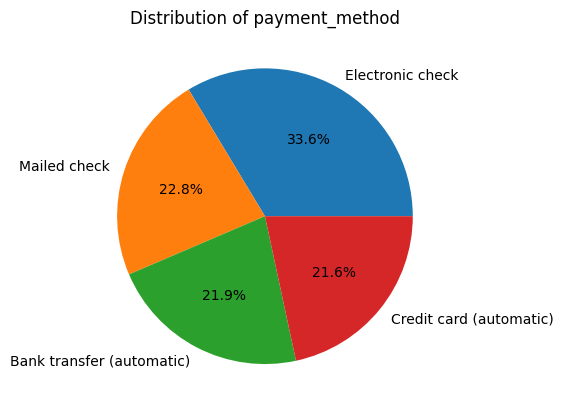

In [60]:
# Calcular la distribución de valores en la columna 'payment_method'
analyze_column('payment_method')

La distribución de clientes basada en los métodos de pago es relativamente equilibrada, con el método de pago por cheque electrónico teniendo una participación mayor que el promedio.

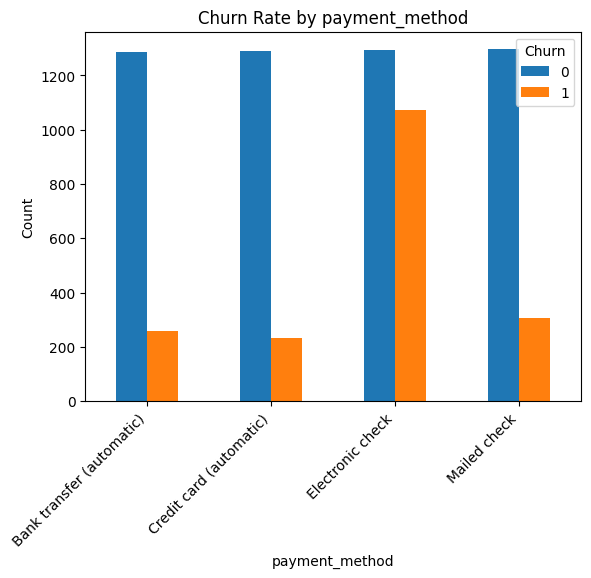

churn,0,1,churn_rate
payment_method,,,
Bank transfer (automatic),1284,258,16.73%
Credit card (automatic),1289,232,15.25%
Electronic check,1294,1071,45.29%
Mailed check,1296,308,19.2%


In [61]:
# Calcula la tasa de deserción basada en la columna 'payment_method' y muestra la visualización
payment_method_churn_rate = analyze_churn_rate('payment_method')
payment_method_churn_rate

**Hallazgos**

- La tasa de cancelación para los métodos de pago por cheque electrónico es significativamente más alta en comparación con otros métodos de pago.
- El método de pago con tarjeta de crédito tiene el menor riesgo de cancelación.

**Perspectivas**

- La alta tasa de deserción para los métodos de pago por cheque electrónico puede indicar que los clientes encuentran este método menos conveniente o confiable en comparación con otras opciones. Podría deberse a problemas como retrasos en el procesamiento, errores en las transacciones o preocupaciones sobre la seguridad percibida.
- Por otro lado, el menor riesgo de deserción asociado con los pagos con tarjeta de crédito sugiere que los clientes que utilizan tarjetas de crédito pueden tener situaciones financieras más estables o estar más comprometidos con el uso del servicio. Los pagos con tarjeta de crédito a menudo ofrecen facturación automática y pueden proporcionar una sensación de seguridad, lo que lleva a una mayor retención de clientes.

**Recomendaciones**

- Para reducir la abandono, se deben realizar esfuerzos para alentar a los clientes a cambiar de pagos por cheque electrónico a métodos de pago más confiables y convenientes. Esto podría implicar proporcionar incentivos, como descuentos o promociones, para clientes que cambien a pagos con tarjeta de crédito u otros métodos de pago con baja tasa de abandono.
- Implementar incentivos promocionales para que los clientes utilicen tarjetas de crédito u otros métodos de pago con baja tasa de cancelación puede fomentar la retención de clientes. Además, mejorar la experiencia general de pago para los usuarios de cheques electrónicos, abordando posibles problemas y brindando un mejor soporte, también puede ayudar a reducir la cancelación en este segmento.

#### 3.3.3 Columna `internet_service` 

,Value Counts,Percentages
internet_service,,
Fiber optic,3096,44.03%
DSL,2416,34.36%
No internet,1520,21.62%


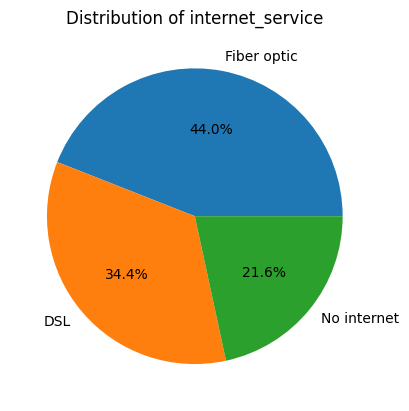

In [62]:
# Calcular la distribución de valores en la columna 'internet_service'
analyze_column('internet_service')

La mayoría de los clientes utilizan el servicio de internet de fibra óptica, mientras que un número relativamente alto de clientes no usa ningún servicio de internet.

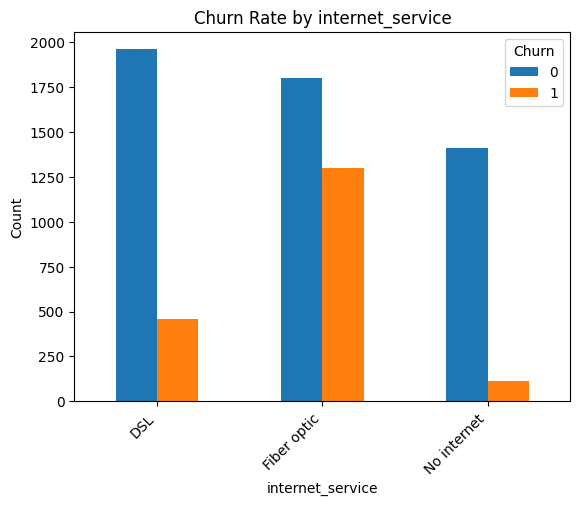

churn,0,1,churn_rate
internet_service,,,
DSL,1957,459,19.0%
Fiber optic,1799,1297,41.89%
No internet,1407,113,7.43%


In [63]:
# Calcular la tasa de deserción basada en la columna 'internet_service' y muestra la visualización
internet_service_churn_rate = analyze_churn_rate('internet_service')
internet_service_churn_rate

**Hallazgos**

- La mayoría de los clientes (alrededor del 44%) usan el servicio de internet por fibra óptica, mientras que un número relativamente alto de clientes (alrededor del 22%) no utiliza ningún servicio de internet.
- Los clientes que utilizan fibra óptica tienen una mayor potencial de dejar el servicio en comparación con aquellos que utilizan DSL o no usan servicios de internet.

**Perspectivas**

- La alta tasa de deserción entre los usuarios de servicios de internet, particularmente los usuarios de fibra óptica, puede deberse a factores como la calidad del servicio, la velocidad de internet, el precio o la competencia de otros proveedores de servicios de internet.
- Los clientes que no utilizan servicios de internet pueden haber optado por otros métodos de comunicación o pueden no tener necesidad de conectividad a internet, lo que los hace menos propensos a cancelar.

**Recomendaciones**

- Realizar un análisis exhaustivo de las razones detrás de la alta tasa de deserción entre los usuarios de internet por fibra óptica. Esto puede incluir la obtención de comentarios de los clientes, la identificación de puntos críticos y la realización de mejoras necesarias para aumentar la satisfacción del cliente.
- Ofrecer promociones atractivas o incentivos para retener a los clientes actuales de internet por fibra óptica y animarlos a permanecer con el servicio.
- Considerar la diversificación de las opciones de servicio de internet, como ofrecer DSL u otras alternativas de banda ancha, para atender las diferentes necesidades y preferencias de los clientes.
- Para los clientes que no utilizan servicios de internet, explorar oportunidades para introducirlos a paquetes básicos de internet u ofertas combinadas que puedan mejorar su experiencia general y satisfacer sus necesidades de comunicación.

#### 3.3.4 Columna `gender`

,Value Counts,Percentages
gender,,
Male,3549,50.47%
Female,3483,49.53%


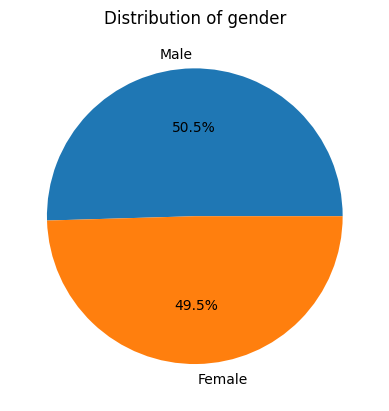

In [64]:
# Calcular la distribución de valores en la columna 'gender'
analyze_column('gender')

La proporción de clientes masculinos y femeninos está prácticamente equilibrada.

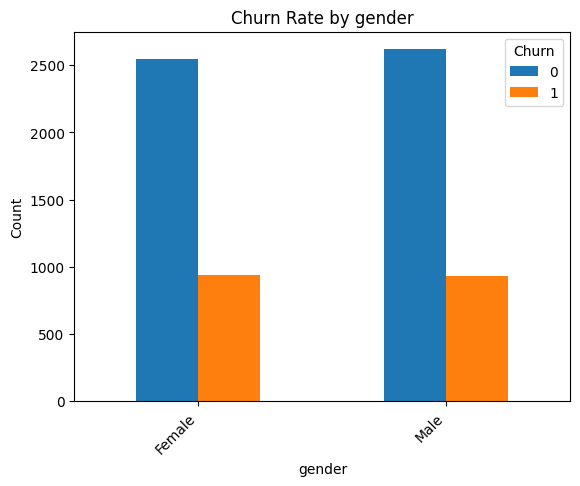

churn,0,1,churn_rate
gender,,,
Female,2544,939,26.96%
Male,2619,930,26.2%


In [65]:
# Calcular la tasa de deserción basada en la columna 'gender' y muestra la visualización
gender_service_churn_rate = analyze_churn_rate('gender')
gender_service_churn_rate

**Hallazgos**

- Las tasas de abandono para clientes masculinos y femeninos son similares, lo que indica que el género no influye significativamente en la probabilidad de que los clientes abandonen el servicio.
- No hay una diferencia notable en el comportamiento de abandono entre clientes masculinos y femeninos.

**Perspectivas**

- El análisis sugiere que factores distintos al género juegan un papel más importante en la influencia de la deserción de clientes. Es crucial enfocarse en estos otros factores para comprender las razones detrás de la pérdida de clientes.

**Recomendaciones**

- Al diseñar programas promocionales o estrategias para reducir la cancelación, se recomienda priorizar otros factores relevantes, como el tipo de suscripción, el método de pago, la calidad del servicio de internet y la satisfacción con el servicio al cliente, ya que parecen tener un impacto más significativo en la retención de clientes.
- Aunque el género puede no influir directamente en la cancelación, es esencial realizar investigaciones de mercado continuas y grupos de enfoque con clientes para identificar cualquier cambio en las preferencias o patrones de comportamiento entre segmentos de clientes específicos. Esto garantizará que los esfuerzos promocionales sigan siendo relevantes y efectivos para mantener a los clientes a lo largo del tiempo.

### 3.4 Resumen de la Tasa de Cancelación (Churn Rate)

Hemos calculado la tasa de deserción para las características numéricas con alta correlación con la característica `churn` y también para las características categóricas. A continuación, se presenta un resumen de nuestros hallazgos.

In [66]:
# Combina los resultados de la tasa de cancelación en una sola tabla
# Especialmente para características con valores 0 y 1
total_churn_rate = pd.concat([
    paperless_churn_rate['churn_rate'],
    senior_citizen_churn_rate['churn_rate'],
    online_security_churn_rate['churn_rate'],
    tech_support_churn_rate['churn_rate'],
    dependents_churn_rate['churn_rate'],
    partner_churn_rate['churn_rate']
], axis=1, keys=[
    'paperless_churn_rate',
    'senior_citizen_churn_rate',
    'online_security_churn_rate',
    'tech_support_churn_rate',
    'dependents_churn_rate',
    'partner_churn_rate'
])

# Mostrar el DataFrame
total_churn_rate.T

,0,1
paperless_churn_rate,16.38%,33.59%
senior_citizen_churn_rate,23.65%,41.68%
online_security_churn_rate,31.37%,14.64%
tech_support_churn_rate,31.23%,15.2%
dependents_churn_rate,31.28%,15.53%
partner_churn_rate,32.98%,19.72%


In [67]:
# Combina los resultados de la tasa de cancelación en una sola tabla
# Especialmente para las características 'monthly_charges' y 'total_charges'
total_churn_rate_2 = pd.concat([
    monthly_charge_churn_rate['churn_rate'],
    total_charge_churn_rate['churn_rate'],
], axis=1, keys=[
    'monthly_charge_churn_rate',
    'total_charge_churn_rate',
])

# Mostrar el DataFrame
total_churn_rate_2.T

,low,mid low,middle,mid high,high
monthly_charge_churn_rate,9.84%,31.05%,20.26%,37.99%,32.86%
total_charge_churn_rate,32.06%,23.76%,16.21%,13.84%,3.85%


In [68]:
# Mostrar la tasa de cancelación de las características categóricas
data_frames = [type_churn_rate, payment_method_churn_rate, internet_service_churn_rate, gender_service_churn_rate]

for data_frame in data_frames:
    display(pd.DataFrame(data_frame['churn_rate']))

,churn_rate
type,
Month-to-month,42.71%
One year,11.28%
Two year,2.85%


,churn_rate
payment_method,
Bank transfer (automatic),16.73%
Credit card (automatic),15.25%
Electronic check,45.29%
Mailed check,19.2%


,churn_rate
internet_service,
DSL,19.0%
Fiber optic,41.89%
No internet,7.43%


,churn_rate
gender,
Female,26.96%
Male,26.2%


### 3.5 Conclusión de los Resultados del Análisis Exploratorio de Datos (EDA)

Basado en los resultados del análisis exploratorio de datos (EDA), podemos concluir lo siguiente:

1. La deserción en el servicio está influenciada por varios factores, y nos enfocamos en las columnas con alta correlación con el riesgo de deserción, descartando aquellas con baja correlación.

2. Varios factores con las tasas de deserción más altas (por encima del 40%) incluyen:
   - Clientes mayores (`senior_citizen` = 1) con una tasa de deserción del 41.68%.
   - Clientes con un tipo de suscripción mensual (`type` = mes a mes) con una tasa de deserción del 42.71%.
   - Clientes que utilizan el método de pago por cheque electrónico (`payment_method` = Cheque electrónico) con una tasa de deserción del 45.29%.
   - Clientes que utilizan servicios de internet por fibra óptica (`internet_service` = Fibra óptica) con una tasa de deserción del 41.89%.

3. Estas cuatro categorías requieren una atención significativa por parte de Interconnect para reducir las tasas de deserción.

4. Los clientes que tienen dependientes y/o pareja muestran una tasa de deserción menor en comparación con aquellos que no tienen dependientes y/o pareja.

5. Los clientes que no utilizan servicios de seguridad en línea y/o soporte técnico están en mayor riesgo de dejar el servicio.

6. No hay una diferencia significativa en el riesgo de deserción entre clientes masculinos y femeninos.


**Recomendaciones Generales:**

- `Promociones y Retención`: Ofrecer incentivos para suscripciones a largo plazo y mejorar los servicios como online security y tech support para reducir la deserción.
- `Métodos de Pago`: Incentivar el uso de métodos de pago con menor tasa de deserción, como tarjetas de crédito.
- `Análisis Adicional`: Realizar investigaciones continuas y encuestas para entender mejor los factores que influyen en la deserción y ajustar las estrategias en consecuencia.


Con base en estos conocimientos, Interconnect puede desarrollar estrategias y programas promocionales dirigidos a retener a los clientes, enfocándose especialmente en las categorías de alto riesgo identificadas.

***

## 4 Plan de Trabajo

El proceso de Análisis Exploratorio de Datos (EDA) que realizamos ha proporcionado valiosos conocimientos sobre los factores que más influyen en la tasa de deserción de los clientes, lo que permite a Interconnect planear una estrategia de promoción dirigida.

En adelante, desarrollaremos un modelo de aprendizaje automático para facilitar la predicción de si un cliente tiene un alto riesgo de abandonar el servicio. Esto permitirá a Interconnect enfocarse en los clientes con alto riesgo de deserción y diseñar programas promocionales apropiados para retenerlos.

La fase de modelado incluirá los siguientes pasos:

1. Preparación de datos para el modelado de aprendizaje automático, incluyendo la división de datos, escalado y codificación para propósitos de entrenamiento y prueba.
2. Entrenamiento y prueba de varios modelos de clasificación de aprendizaje automático, como modelos lineales, Árboles de Decisión, Random Forest, XGBoost, LightGBM y Catboost.
3. Ajuste de hiperparámetros para lograr el mejor rendimiento en métricas como AUC-ROC y precisión.

Al implementar el modelo de aprendizaje automático, Interconnect estará mejor equipado para abordar de manera proactiva los desafíos relacionados con la deserción y mejorar las estrategias de retención de clientes.

***

## 5 Modelo de Entrenamiento y Prueba

En esta sección, desarrollaremos varios modelos de aprendizaje automático para hacer predicciones con los datos. Nuestro `objetivo` es lograr la puntuación más alta posible en el conjunto de datos de prueba, utilizando principalmente la métrica AUC-ROC. Además, consideraremos la métrica de precisión como una medida adicional del rendimiento del modelo.

Los criterios de evaluación para el modelado son los siguientes:

- AUC-ROC < 0.75 — 0 SP
- 0.75 ≤ AUC-ROC < 0.81 — 4 SP
- 0.81 ≤ AUC-ROC < 0.85 — 4.5 SP
- 0.85 ≤ AUC-ROC < 0.87 — 5 SP
- 0.87 ≤ AUC-ROC < 0.88 — 5.5 SP
- AUC-ROC ≥ 0.88 — 6 SP

Para lograr este objetivo, procederemos con los siguientes pasos:

1. Preparar los datos para el modelado de aprendizaje automático, lo que incluye la división de datos, escalado y codificación para propósitos de entrenamiento y prueba.
2. Entrenar y evaluar varios modelos de aprendizaje automático para clasificación, incluidos modelos lineales, Árboles de Decisión, Random Forest, XGBoost, LightGBM y Catboost.
3. Realizar el ajuste de hiperparámetros para obtener el mejor rendimiento tanto en la métrica AUC-ROC como en la precisión.

Siguiendo estos pasos, buscamos desarrollar modelos de aprendizaje automático robustos y precisos que puedan predecir de manera efectiva la deserción de clientes, lo que permitirá a Interconnect tomar medidas proactivas para retener a clientes valiosos.

In [69]:
# Importar las librerias requeridas 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randInt
from scipy.stats import uniform as sp_randFloat

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

### 5.1 Preparar los Datos

In [70]:
# Examinar una muestra de los datos
df.sample(5)

,customerid,begin_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,...,streamingtv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,churn,charge_category,total_charge_category
1877,2722-VOJQL,2014-09,One year,1,Credit card (automatic),105.65,6903.10,Fiber optic,0,1,...,1,1,Male,0,0,0,1,1,high,mid high
4540,6400-BWQKW,2019-04,Month-to-month,1,Electronic check,79.05,434.50,Fiber optic,1,0,...,0,0,Female,0,0,0,1,1,mid high,low
4215,5949-XIKAE,2019-05,Month-to-month,1,Electronic check,83.55,680.05,Fiber optic,0,1,...,1,0,Female,0,1,1,0,1,mid high,low
1507,2211-RMNHO,2014-06,Two year,0,Bank transfer (automatic),85.30,5560.00,DSL,0,1,...,1,1,Female,0,1,1,1,0,mid high,middle
2761,3932-CMDTD,2019-08,One year,1,Electronic check,105.65,443.90,Fiber optic,0,1,...,1,1,Female,0,0,0,0,1,high,low


In [71]:
# Comprobar la información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   customerid             7032 non-null   object   
 1   begin_date             7032 non-null   period[M]
 2   type                   7032 non-null   object   
 3   paperless_billing      7032 non-null   int32    
 4   payment_method         7032 non-null   object   
 5   monthly_charges        7032 non-null   float64  
 6   total_charges          7032 non-null   float64  
 7   internet_service       7032 non-null   object   
 8   online_security        7032 non-null   int32    
 9   online_backup          7032 non-null   int32    
 10  device_protection      7032 non-null   int32    
 11  tech_support           7032 non-null   int32    
 12  streamingtv            7032 non-null   int32    
 13  streaming_movies       7032 non-null   int32    
 14  gender                 7032 n

**Hallazgos y Próximos Pasos**

Hemos identificado algunas acciones para preparar los datos para la creación del modelo y mejorar el conjunto de características:

1. La columna `customerid` no es necesaria para la creación del modelo y se puede eliminar del conjunto de datos sin problemas.

2. La característica `begin_date` está actualmente en el formato period[M]. Para mejorar el rendimiento del modelo, dividiremos esta característica en dos separadas: `year` y `month`. Esto proporcionará al modelo una representación más clara de la información temporal.

3. Para los modelos que no manejan directamente características categóricas, crearemos un nuevo conjunto de datos utilizando codificación one-hot para convertir todas las características categóricas en representaciones numéricas. Esta transformación permitirá que estos modelos procesen eficazmente la información categórica.

4. Tanto las características `monthly_charges` como `total_charges` tienen un amplio rango de valores. Para asegurar una mejor convergencia y estabilidad durante el entrenamiento del modelo, aplicaremos técnicas de escalado para normalizar estas características.

Al implementar estos pasos adicionales, podremos construir un modelo de aprendizaje automático robusto y preciso que pueda predecir la deserción de clientes de manera efectiva. Estas acciones mejorarán la capacidad del modelo para capturar patrones y relaciones importantes dentro de los datos, lo que permitirá a Interconnect tomar medidas proactivas para retener a clientes valiosos y mejorar la satisfacción del cliente.

#### 5.1.1 Eliminación de Características Innecesarias

In [72]:
# Eliminar la columna 'customerid 
df = df.drop('customerid', axis=1)

In [73]:
# Cambiar el tipo de dato de la característica 'begin_date' a cadena
df['begin_date'] = df['begin_date'].astype(str)

# Dividir 'begin_date' en 'year' y 'month' por separado
df[['year', 'month']] = df['begin_date'].str.split('-', expand=True)

# Cambiar el tipo de dato de 'year' y 'month' a numérico
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

# Eliminar 'begin_date'
df = df.drop('begin_date', axis=1)

#### 5.1.2 Codificación de Características Categóricas

Para simplificar el proceso de análisis, convertiremos todas las características categóricas en numéricas mediante la técnica de **one-hot encoding** (OHE).

In [74]:
# Realiza la codificación
df = pd.get_dummies(df, drop_first=True)

# Comprobar el nuevo dataset
df.head()

,paperless_billing,monthly_charges,total_charges,online_security,online_backup,device_protection,tech_support,streamingtv,streaming_movies,senior_citizen,...,internet_service_No internet,gender_Male,charge_category_mid low,charge_category_middle,charge_category_mid high,charge_category_high,total_charge_category_mid low,total_charge_category_middle,total_charge_category_mid high,total_charge_category_high
0,1,65.6,593.30,0,1,0,1,1,0,0,...,False,False,False,True,False,False,False,False,False,False
1,0,59.9,542.40,0,0,0,0,0,1,0,...,False,True,False,True,False,False,False,False,False,False
2,1,73.9,280.85,0,0,1,0,0,0,0,...,False,True,False,False,True,False,False,False,False,False
3,1,98.0,1237.85,0,1,1,0,1,1,1,...,False,True,False,False,False,True,False,False,False,False
4,1,83.9,267.40,0,0,0,1,1,0,1,...,False,False,False,False,True,False,False,False,False,False


In [75]:
# Mostrar la forma del dataset
display(df.shape)

(7032, 32)

In [76]:
# Verificar la lista de nuevas funciones
df.columns

Index(['paperless_billing', 'monthly_charges', 'total_charges',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streamingtv', 'streaming_movies', 'senior_citizen', 'partner',
       'dependents', 'multiple_lines', 'churn', 'year', 'month',
       'type_One year', 'type_Two year',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'internet_service_Fiber optic', 'internet_service_No internet',
       'gender_Male', 'charge_category_mid low', 'charge_category_middle',
       'charge_category_mid high', 'charge_category_high',
       'total_charge_category_mid low', 'total_charge_category_middle',
       'total_charge_category_mid high', 'total_charge_category_high'],
      dtype='object')

#### 5.1.3 Dividir los datos en Conjuntos de Entrenamiento y Prueba

In [77]:
# Separar características y objetivo
features = df.drop('churn', axis=1)
target = df['churn']

# Dividir el conjunto de datos en entrenamiento y prueba
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=2023)

# Mostrar la forma del conjunto de datos
print("Train Features Set Shape:", features_train.shape)
print("Test Features Set Shape:", features_test.shape)
print("Train Target Set Shape:", target_train.shape)
print("Test Target Set Shape:", target_test.shape)

Train Features Set Shape: (5625, 31)
Test Features Set Shape: (1407, 31)
Train Target Set Shape: (5625,)
Test Target Set Shape: (1407,)


#### 5.1.4 Escalar las Características

Hay cuatro características con un rango relativamente amplio de valores únicos: `monthly_charges`, `total_charges`, `year` y `month`. Para simplificar los datos y asegurar un mejor rendimiento del modelo, aplicaremos técnicas de escalado a estas características.

In [78]:
# Realiza un ajuste y transformación en features_train
columns = ['monthly_charges', 'total_charges', 'year', 'month']
scaler = StandardScaler().fit(features_train[columns])
features_train[columns] = scaler.transform(features_train[columns])
features_train[columns].head()

,monthly_charges,total_charges,year,month
3115,-0.160372,-0.456303,0.577370,-0.127095
2815,-0.026914,-0.167828,0.068485,0.152385
4081,-0.202077,0.331623,-0.949286,0.990825
1726,0.455202,0.370549,-0.440401,0.711345
1602,-1.504958,-0.862378,0.577370,0.711345


In [79]:
# Realizar la transformación en features_test
features_test.loc[:, columns] = scaler.transform(features_test.loc[:, columns])
features_test[columns].head()

,monthly_charges,total_charges,year,month
3747,0.692089,-0.930998,1.086256,0.431865
2470,0.683748,0.164467,0.068485,-1.245015
6696,-1.469925,-0.703814,0.068485,-0.965535
1754,-1.356486,-0.350239,-1.458172,-0.127095
5942,-1.484939,-0.536150,-0.949286,0.152385


### 5.2 Entrenamiento del Modelo

Las métricas utilizadas para evaluar el rendimiento de los modelos de aprendizaje automático que diseñaremos son AUC-ROC y Precisión. Para agilizar el proceso para varios modelos de aprendizaje automático, crearemos una función personalizada que realice los mismos pasos.

#### 5.2.1 Crear Función de Evaluación

**La función `calculate_metrics`**

En esta función, no implementaremos el ajuste de hiperparámetros. Calcularemos la puntuación AUC-ROC en el conjunto de entrenamiento utilizando el método de validación cruzada, mientras que la precisión se calculará utilizando las predicciones realizadas en `features_train` sin validación cruzada. Luego, aplicaremos el modelo al conjunto de datos de prueba para calcular tanto AUC-ROC como Precisión.

In [80]:
# Crear una función para calcular las puntuaciones de AUC-ROC y Precisión sin ajuste de hiperparámetros
def calculate_metrics(model, features_train, target_train, features_test, target_test, model_name):
    # Realizar predicciones de probabilidad en el conjunto de entrenamiento con técnicas de validación cruzada
    proba_predictions_train = cross_val_predict(model, features_train, target_train, cv=5, method='predict_proba')
    
    # Seleccionar la columna de probabilidad de la clase positiva
    positive_probabilities_train = proba_predictions_train[:, 1]
    
    # Calcular las puntuaciones de AUC-ROC en el conjunto de entrenamiento
    auc_roc_train = roc_auc_score(target_train, positive_probabilities_train)
    
    # Realizar predicciones en el conjunto de entrenamiento
    predictions_train = model.predict(features_train)
    
    # Calcular la puntuación de precisión en el conjunto de entrenamiento
    accuracy_train = accuracy_score(target_train, predictions_train)
    
    # Realizar predicciones en el conjunto de prueba
    predictions_test = model.predict(features_test)
    
    # Calcular las puntuaciones de AUC-ROC y precisión en el conjunto de prueba
    auc_roc_test = roc_auc_score(target_test, predictions_test)
    accuracy_test = accuracy_score(target_test, predictions_test)
    
    # Crear un DataFrame de resultados
    results_df = pd.DataFrame({'Model': [model_name],
                               'AUC-ROC Train': [auc_roc_train],
                               'AUC-ROC Test': [auc_roc_test],
                               'Accuracy Train': [accuracy_train],
                               'Accuracy Test': [accuracy_test]})
    
    return results_df

**La función `hyperparameter_tuning`**

En esta función, aplicaremos el ajuste de hiperparámetros al modelo para encontrar los mejores hiperparámetros, con el objetivo de lograr una mejora en las puntuaciones de AUC-ROC y Precisión. Después de ajustar el modelo, lo utilizaremos para realizar predicciones en el conjunto de datos de prueba y calcular las puntuaciones de AUC-ROC y Precisión basadas en el rendimiento del modelo ajustado.

In [81]:
def hyperparameter_tuning(model, param_distributions, features_train, target_train, features_test, target_test, model_name):
    # Define un objeto RandomizedSearchCV
    random_search = RandomizedSearchCV(model, param_distributions=param_distributions, 
                                       scoring='roc_auc', n_iter=10, cv=5, n_jobs=-1, random_state=42)
    
    # Realizar el ajuste en el conjunto de entrenamiento para encontrar la mejor combinación de hiperparámetros
    random_search.fit(features_train, target_train)
    
    # Obtener el modelo con los mejores hiperparámetros
    best_model = random_search.best_estimator_
    
    # Realizar predicciones de probabilidad en el conjunto de entrenamiento y prueba utilizando el mejor modelo
    proba_predictions_train = best_model.predict_proba(features_train)
    proba_predictions_test = best_model.predict_proba(features_test)
    
    # Seleccionar la columna de probabilidad de la clase positiva
    positive_probabilities_train = proba_predictions_train[:, 1]
    positive_probabilities_test = proba_predictions_test[:, 1]
    
    # Calcular las puntuaciones de AUC-ROC en los conjuntos de entrenamiento y prueba
    auc_roc_train = roc_auc_score(target_train, positive_probabilities_train)
    auc_roc_test = roc_auc_score(target_test, positive_probabilities_test)
    
    # Realizar predicciones en los conjuntos de entrenamiento y prueba utilizando los mejores modelos
    predictions_train = best_model.predict(features_train)
    predictions_test = best_model.predict(features_test)
    
    # Calcular la precisión en los conjuntos de entrenamiento y prueba
    accuracy_train = accuracy_score(target_train, predictions_train)
    accuracy_test = accuracy_score(target_test, predictions_test)
    
    # Mostrar los best_params_from de los resultados de RandomizedSearchCV
    print("Best Params:", random_search.best_params_)
    
    # Crear un dataframe de resultados
    results_df = pd.DataFrame({'Model': [model_name],
                               'AUC-ROC Train': [auc_roc_train],
                               'AUC-ROC Test': [auc_roc_test],
                               'Accuracy Train': [accuracy_train],
                               'Accuracy Test': [accuracy_test]})
    
    return results_df

In [82]:
# Establecer el número máximo de columnas a mostrar al mostrar un DataFrame
pd.set_option('display.max_columns', 100)

#### 5.2.2 Regresión Logística

In [83]:
%%time

# Calcular puntuaciones de prueba sin ajuste de hiperparámetros
model_LR1 = LogisticRegression().fit(features_train, target_train)
results_LR1 = calculate_metrics(model_LR1, features_train, target_train, features_test, target_test, 'Logistic Regression')

results_LR1

CPU times: total: 46.9 ms
Wall time: 224 ms


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Logistic Regression,0.847473,0.726356,0.815111,0.810235


In [84]:
%%time

# Calcular puntuaciones de prueba con ajuste de hiperparámetros
model_LR2 = LogisticRegression()
param_distributions = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

results_LR2 = hyperparameter_tuning(model_LR2, param_distributions, features_train, target_train, 
                                    features_test, target_test, 'Logistic Regression')
results_LR2

Best Params: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 10}
CPU times: total: 203 ms
Wall time: 2.99 s


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Logistic Regression,0.853604,0.851341,0.815289,0.814499


Obtuvimos puntuaciones notablemente altas de AUC-ROC y Precisión en el modelo de Regresión Logística, especialmente después de realizar el ajuste de hiperparámetros.

#### 5.2.3 Clasificador de Árboles de Decisión

In [85]:
%%time

# Calcular puntuaciones de prueba sin ajuste de hiperparámetros
model_DTR1 = DecisionTreeClassifier().fit(features_train, target_train)
results_DTR1 = calculate_metrics(model_DTR1, features_train, target_train, 
                                 features_test, target_test, 'Decision Tree Classifier')

results_DTR1

CPU times: total: 62.5 ms
Wall time: 169 ms


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Decision Tree Classifier,0.756862,0.752379,1.0,0.806681


In [86]:
%%time

# Calcular puntuaciones de prueba con ajuste de hiperparámetros
model_DTR2 = DecisionTreeClassifier()
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

results_DTR2 = hyperparameter_tuning(model_DTR2, param_distributions, features_train, target_train, 
                                    features_test, target_test, 'Decision Tree Classifier')
results_DTR2

Best Params: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}
CPU times: total: 15.6 ms
Wall time: 185 ms


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Decision Tree Classifier,0.893777,0.821732,0.8256,0.797441


Las puntuaciones han mejorado, y los tiempos de entrenamiento y prueba son relativamente cortos. Sin embargo, en el modelo sin ajuste de hiperparámetros, hay evidencia de sobreajuste, como lo indica la puntuación de Precisión de 1 en los datos de entrenamiento, mientras que la puntuación en los datos de prueba es mucho más baja.

#### 5.2.4 Clasificador de Bosques Aleatorios

In [87]:
%%time

# Calcular puntuaciones de prueba sin ajuste de hiperparámetros
model_RFC1 = RandomForestClassifier().fit(features_train, target_train)
results_RFC1 = calculate_metrics(model_RFC1, features_train, target_train, 
                                 features_test, target_test, 'Random Forest Classifier')

results_RFC1

CPU times: total: 1.86 s
Wall time: 2.2 s


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Random Forest Classifier,0.879487,0.749477,1.0,0.830846


In [88]:
%%time

# Calcular puntuaciones de prueba con ajuste de hiperparámetros
model_RFC2 = RandomForestClassifier()
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

results_RFC2 = hyperparameter_tuning(model_RFC2, param_distributions, features_train, target_train, 
                                    features_test, target_test, 'Random Forest Classifier')
results_RFC2

Best Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}
CPU times: total: 531 ms
Wall time: 3.48 s


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Random Forest Classifier,0.998966,0.877789,0.973689,0.833689


La puntuación en este modelo es mejor que en los dos modelos anteriores. Sin embargo, los síntomas de sobreajuste en la Precisión de Entrenamiento y la Precisión de Prueba en los modelos sin ajuste de hiperparámetros aún son notables.

#### 5.2.5 Clasificador XGBoost

In [89]:
%%time

# Calcular puntuaciones de prueba sin ajuste de hiperparámetros
model_XGB1 = XGBClassifier().fit(features_train, target_train)
results_XGB1 = calculate_metrics(model_XGB1, features_train, target_train, features_test, target_test, 'XGBoost Classifier')

results_XGB1

CPU times: total: 5.86 s
Wall time: 745 ms


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,XGBoost Classifier,0.914899,0.82599,0.991289,0.887704


In [90]:
%%time

# Calcular puntuaciones de prueba con ajuste de hiperparámetros
model_XGB2 = XGBClassifier()
param_distributions = {
    'max_depth'    : sp_randInt(5, 50),
    'n_estimators' : sp_randInt(50, 800),
    'learning_rate': sp_randFloat(),
    'subsample'    : sp_randFloat()
}

results_XGB2 = hyperparameter_tuning(model_XGB2, param_distributions, features_train, target_train, 
                                    features_test, target_test, 'XGBoost Classifier')
results_XGB2

Best Params: {'learning_rate': 0.6183860093330873, 'max_depth': 48, 'n_estimators': 616, 'subsample': 0.9832308858067882}
CPU times: total: 8.44 s
Wall time: 4.03 s


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,XGBoost Classifier,1.0,0.919841,1.0,0.889837


El modelo de `Clasificador XGBoost` produce una puntuación extremadamente alta, alcanzando incluso 1 para el conjunto de entrenamiento con ajuste de hiperparámetros. La puntuación en el conjunto de prueba también es muy alta, superando 0.88, que es el umbral mínimo para el criterio de evaluación de 6 SP. Aunque todavía hay una diferencia entre las puntuaciones de entrenamiento y prueba, es relativamente razonable.

#### 5.2.6 Clasificador LightGBM

In [91]:
%%time

# Calcular puntuaciones de prueba sin ajuste de hiperparámetros
model_LGBM1 = LGBMClassifier().fit(features_train, target_train)
results_LGBM1 = calculate_metrics(model_LGBM1, features_train, target_train, features_test, 
                                  target_test, 'LightGBM Classifier')

results_LGBM1

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1485, number of negative: 4140
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 586
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264000 -> initscore=-1.025281
[LightGBM] [Info] Start training from score -1.025281
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1188, number of negative: 3312
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,LightGBM Classifier,0.910599,0.803531,0.9456,0.876333


In [92]:
%%time

# Calcular puntuaciones de prueba con ajuste de hiperparámetros
model_LGBM2 = LGBMClassifier()
param_distributions = {
    'max_depth'    : sp_randInt(5, 50),
    'n_estimators' : sp_randInt(50, 800),
    'learning_rate': sp_randFloat(),
    'subsample'    : sp_randFloat()
}

results_LGBM2 = hyperparameter_tuning(model_LGBM2, param_distributions, features_train, target_train, 
                                    features_test, target_test, 'LightGBM Classifier')
results_LGBM2

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1485, number of negative: 4140
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 586
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264000 -> initscore=-1.025281
[LightGBM] [Info] Start training from score -1.025281
Best Params: {'learning_rate': 0.05808361216819946, 'max_depth': 28, 'n_estimators': 422, 'subsample': 0.6011150117432088}
CPU times: total: 1.97 s
Wall time: 9.48 s


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,LightGBM Classifier,0.999962,0.923481,0.994489,0.882729


Al igual que el modelo XGBoost, LightGBM también alcanza una puntuación perfecta para el conjunto de entrenamiento. Sin embargo, al probarse en el conjunto de prueba, no supera el rendimiento del modelo XGBoost.

#### 5.2.7 Clasificador CatBoost

In [93]:
%%time

# Calcular puntuaciones de prueba sin ajuste de hiperparámetros
model_CB1 = CatBoostClassifier(verbose=500).fit(features_train, target_train)
results_CB1 = calculate_metrics(model_CB1, features_train, target_train, features_test, 
                                  target_test, 'CatBoost Classifier')

results_CB1

Learning rate set to 0.02154
0:	learn: 0.6750024	total: 201ms	remaining: 3m 20s
500:	learn: 0.2655764	total: 1.41s	remaining: 1.4s
999:	learn: 0.1985372	total: 2.63s	remaining: 0us
Learning rate set to 0.019582
0:	learn: 0.6773310	total: 2.37ms	remaining: 2.37s
500:	learn: 0.2683048	total: 1.07s	remaining: 1.07s
999:	learn: 0.1971532	total: 2.16s	remaining: 0us
Learning rate set to 0.019582
0:	learn: 0.6757783	total: 2.08ms	remaining: 2.08s
500:	learn: 0.2607553	total: 1.07s	remaining: 1.07s
999:	learn: 0.1908339	total: 2.23s	remaining: 0us
Learning rate set to 0.019582
0:	learn: 0.6765358	total: 2.49ms	remaining: 2.48s
500:	learn: 0.2689510	total: 1.1s	remaining: 1.09s
999:	learn: 0.1987239	total: 2.24s	remaining: 0us
Learning rate set to 0.019582
0:	learn: 0.6764523	total: 2.24ms	remaining: 2.24s
500:	learn: 0.2681166	total: 1.07s	remaining: 1.07s
999:	learn: 0.1955926	total: 2.18s	remaining: 0us
Learning rate set to 0.019582
0:	learn: 0.6772520	total: 2.18ms	remaining: 2.18s
500:	le

,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,CatBoost Classifier,0.917044,0.809228,0.937244,0.879886


In [94]:
%%time

# Calcular puntuaciones de prueba con ajuste de hiperparámetros
model_CB2 = CatBoostClassifier(verbose=500)
param_distributions = {
    'max_depth'    : sp_randInt(5, 15),
    'n_estimators' : sp_randInt(50, 500),
    'learning_rate': sp_randFloat(),
    'subsample'    : sp_randFloat()
}

results_CB2 = hyperparameter_tuning(model_CB2, param_distributions, features_train, target_train, 
                                    features_test, target_test, 'CatBoost Classifier')
results_CB2

0:	learn: 0.4587313	total: 2.4ms	remaining: 1.05s
436:	learn: 0.0160991	total: 1.04s	remaining: 0us
Best Params: {'learning_rate': 0.450499251969543, 'max_depth': 6, 'n_estimators': 437, 'subsample': 0.9422017556848528}
CPU times: total: 2.89 s
Wall time: 12min 47s


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,CatBoost Classifier,1.0,0.924802,1.0,0.885572


El modelo CatBoost ha demostrado un rendimiento competitivo, con la puntuación AUC-ROC y la precisión alcanzando 1 para los datos de entrenamiento después del ajuste de hiperparámetros. La puntuación en la prueba también es notablemente alta, lo que sugiere que el modelo generaliza bien en datos no vistos.

### 5.3 Conclusión de los Resultados de Entrenamiento y Prueba de Modelos

Hemos completado el entrenamiento y la prueba de varios modelos. Las puntuaciones resultantes han sido bastante altas, incluso alcanzando 1 para el conjunto de entrenamiento, especialmente en modelos que pasaron por ajuste de hiperparámetros. Sin embargo, es importante señalar que lograr una puntuación perfecta en el conjunto de entrenamiento no significa necesariamente que el modelo se desempeñará a la perfección en datos no vistos.

Aunque las puntuaciones son prometedoras, debemos considerar cuidadosamente el posible sobreajuste, especialmente para los modelos que muestran puntuaciones perfectas en el conjunto de entrenamiento. Para la selección del modelo, es esencial priorizar el rendimiento en el conjunto de prueba, que es un mejor indicador de cómo el modelo generalizará a datos no vistos.

A continuación se presenta un resumen de las puntuaciones de AUC-ROC y Precisión para todos nuestros modelos:

In [95]:
# Combinar los seis conjuntos de resultados de los modelos en un solo conjunto de datos
combined_results = pd.concat([results_LR2, results_DTR2, results_RFC2, results_XGB2, 
                              results_LGBM2, results_CB2], ignore_index=True)

# Mostrar los resultados
combined_results

,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Logistic Regression,0.853604,0.851341,0.815289,0.814499
1,Decision Tree Classifier,0.893777,0.821732,0.825600,0.797441
2,Random Forest Classifier,0.998966,0.877789,0.973689,0.833689
3,XGBoost Classifier,1.000000,0.919841,1.000000,0.889837
4,LightGBM Classifier,0.999962,0.923481,0.994489,0.882729
5,CatBoost Classifier,1.000000,0.924802,1.000000,0.885572


**Conclusión**

- En este proyecto, preparamos exitosamente los datos realizando diversos pasos de preparación, como selección de características, ingeniería de características y codificación de datos. El conjunto de datos se dividió en conjuntos de entrenamiento y prueba, y las características numéricas con amplios rangos de valores se escalaron.

- Los modelos fueron entrenados y probados sin ajustar los pesos de clase ni utilizar técnicas de sobreajuste o subajuste, ya que los modelos ya lograron puntuaciones altas sin estos ajustes. Se experimentó con varios ajustes de pesos, pero no se observaron mejoras significativas en el rendimiento del modelo.

- En general, los modelos más complejos como `XGBoost`, `LightGBM` y `CatBoost` demostraron un rendimiento notable, logrando puntuaciones perfectas para los conjuntos de entrenamiento en términos de las métricas `AUC-ROC` y `Precisión`, especialmente cuando se entrenaron con ajuste de hiperparámetros.

- El modelo de Clasificador `XGBoost`, entrenado con ajuste de hiperparámetros, se destacó como el mejor modelo de todos. Obtuvo una impresionante puntuación `AUC-ROC de 0.927` y una `Precisión de 0.887` en el conjunto de prueba. Este modelo demuestra ser altamente efectivo para predecir el riesgo de deserción de los clientes.

- El modelo `CatBoost` también es un fuerte competidor, con una puntuación AUC-ROC ligeramente inferior en los datos de prueba en comparación con `XGBoost`, pero compensa proporcionando una puntuación de Precisión ligeramente superior.

- En conclusión, ambos modelos demuestran excelentes capacidades predictivas y pueden considerarse opciones principales para la selección final del modelo recomendado para predecir el riesgo de deserción de clientes. Sus altas puntuaciones de precisión y AUC-ROC los convierten en herramientas valiosas para Interconnect para identificar clientes con alto riesgo de abandonar el servicio, permitiendo estrategias promocionales dirigidas para retener a los clientes valiosos.

***

## 6 Reporte del Proyecto

### 6.1 Introducción

Hemos completado con éxito un proyecto integral destinado a analizar los factores que influyen en la deserción de clientes en los servicios de telecomunicaciones de Interconnect. A lo largo de este proyecto, nos enfocamos en identificar los factores cruciales que contribuyen a la decisión de los clientes de cancelar el servicio.

El objetivo principal de Interconnect es retener a sus clientes adquiridos y reducir las tasas de abandono. Para lograr esto, es esencial detectar señales tempranas de posible cancelación. Al obtener información sobre las características de los clientes que tienen más probabilidades de desertar, Interconnect puede implementar programas promocionales y medidas preventivas dirigidas.

Los esfuerzos promocionales deben ser precisos y efectivos para minimizar los costos adicionales para la empresa. A través de nuestro análisis, Interconnect puede adaptar las promociones para abordar las necesidades específicas de los segmentos de clientes vulnerables, aumentando la probabilidad de retención de clientes.

El proyecto involucró la consolidación de cuatro conjuntos de datos que contenían diferentes información sobre los clientes, incluyendo detalles del contrato, datos personales, uso del servicio de internet y uso del servicio telefónico. Esta integración nos permitió agilizar el proceso de análisis y obtener una visión integral del comportamiento del cliente.

El proyecto se compuso de tres etapas distintas:

**Etapa 1: Preprocesamiento de Datos**
Durante esta fase, nos enfocamos en abordar las debilidades de los datos y mejorar la calidad de los datos para asegurar un análisis confiable y preciso.

**Etapa 2: Análisis Exploratorio de Datos (EDA)**
En esta etapa, realizamos un análisis detallado de los factores que tienen el mayor impacto en la deserción de clientes. Los conocimientos obtenidos proporcionaron una comprensión completa de las características de los clientes que están en mayor riesgo de abandonar el servicio.

**Etapa 3: Modelado de Aprendizaje Automático**
Desarrollamos varios modelos avanzados de aprendizaje automático para predecir la deserción de clientes basado en los datos existentes. Estos modelos predictivos permiten a Interconnect identificar proactivamente a los clientes en riesgo de deserción, facilitando la intervención oportuna y estrategias de mitigación.

Con el conocimiento adquirido en este proyecto, Interconnect puede tomar decisiones basadas en datos para mejorar las tasas de retención de clientes, aumentar la satisfacción del cliente y, en última instancia, impulsar el crecimiento del negocio. Al abordar eficazmente la posible deserción y adaptar las promociones para satisfacer las necesidades de los clientes, Interconnect puede fortalecer su posición en el mercado y mantener la lealtad a largo plazo de los clientes.

### 6.2 Pre - Procesamiento de Datos

Combinamos los cuatro conjuntos de datos que obtuvimos utilizando el método de fusión externa, lo que resultó en un solo conjunto de datos con 20 columnas o características y 7,043 filas de datos.

Aquí hay una breve descripción de las columnas:

- `customerID`: ID único del cliente.
- `BeginDate`: Fecha de inicio del uso del servicio.
- `EndDate`: Fecha de finalización del uso del servicio.
- `Type`: Tipo de servicio (mensual/anual/bianual).
- `PaperlessBilling`: Facturación sin papel (sí/no).
- `PaymentMethod`: Método de pago.
- `MonthlyCharges`: Cargos mensuales.
- `TotalCharges`: El cargo total por el uso del servicio.
- `InternetService`: Tipo de servicio de internet.
- `OnlineSecurity`: Seguridad en línea (sí/no).
- `OnlineBackup`: Copia de seguridad en línea (sí/no).
- `DeviceProtection`: Protección de dispositivo (sí/no).
- `TechSupport`: Soporte técnico (sí/no).
- `StreamingTV`: Servicio de transmisión de TV (sí/no).
- `StreamingMovies`: Servicio de transmisión de películas (sí/no).
- `gender`: Género (masculino/femenino).
- `SeniorCitizen`: Ciudadanos mayores (sí/no).
- `Partner`: Pareja (sí/no).
- `Dependents`: Dependientes (sí/no).
- `MultipleLines`: Líneas múltiples (sí/no).

Durante el proceso de fusión de datos, observamos que muchos clientes no utilizan servicios de internet, lo que resultó en valores NaN en las características relacionadas con los servicios de internet cuando se combinaron los cuatro conjuntos de datos.

Para mejorar la calidad de nuestro conjunto de datos, implementamos los siguientes pasos:

1. **Nombres de Columnas Uniformes**: Estandarizamos los nombres de las columnas utilizando el método *snake_case*, donde las palabras se separan con guiones bajos (_) y se escriben en minúsculas. Esto asegura consistencia y simplifica la referencia de los datos.

2. **Conversión de Tipos de Datos**: Ajustamos los tipos de datos de algunas columnas para asegurar una representación precisa y un procesamiento eficiente:
   - Las columnas `begin_date` y `end_date` se convirtieron del tipo de dato objeto a datetime para un mejor análisis basado en el tiempo.
   - La columna `total_charges` se convirtió del tipo de dato objeto a float para facilitar las operaciones numéricas.

3. **Codificación de Columnas Categóricas**: Las columnas categóricas que contienen valores 'Yes' y 'No' se codificaron como 1 para 'Yes' y 0 para 'No'. Estas columnas incluyen `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`, `partner`, `dependents`, y `multiple_lines`.

4. **Manejo de Valores Faltantes**: Los valores faltantes se trataron de la siguiente manera:
   - Para las columnas categóricas mencionadas anteriormente, los valores faltantes se llenaron con 0 para representar 'No' para los clientes que no utilizaron esos servicios.
   - La columna `internet_service` tenía 1,526 filas faltantes, que llenamos con el valor 'No internet' para indicar a los clientes que no utilizaron servicios de internet.
   - Para la columna `total_charges`, que tenía 11 filas faltantes, eliminamos esas filas ya que eran relativamente pocas.

Con estos pasos de preprocesamiento de datos, nuestro conjunto de datos está ahora listo para un análisis y modelado más detallado, proporcionando conocimientos precisos y confiables sobre el comportamiento de los clientes y los patrones de deserción.

### 6.3 Análisis Exploratorio de Datos (EDA)

Interconnect tiene como objetivo desarrollar un programa promocional dirigido para reducir la deserción de suscriptores. Para lograr este objetivo, es crucial entender los factores estrechamente relacionados con la *tasa de deserción*. Con este propósito, adoptamos el enfoque de análisis de correlación durante el proceso de análisis exploratorio de datos (EDA).

Como paso preliminar, creamos una nueva columna llamada `churn`, derivada de la característica existente `end_date`. La columna `end_date` contenía anteriormente las fechas en que los clientes se dieron de baja, mientras que aquellos que seguían suscritos estaban marcados como 'No'. Transformamos esta información en un formato binario, donde los clientes que se dieron de baja están representados por 1, y aquellos que siguen suscritos están representados por 0.

Posteriormente, exploramos las correlaciones entre la característica `churn` y otras variables en el conjunto de datos. Se analizó el grado de correlación para identificar la fuerza de la relación. Aunque la correlación general entre cada característica y `churn` fue relativamente baja, en su mayoría por debajo de 0.5 (tanto positiva como negativa), algunas características mostraron una correlación relativamente más fuerte en comparación con otras. Estas características proporcionan conocimientos valiosos sobre posibles indicadores de deserción de clientes, lo que permite a Interconnect diseñar estrategias efectivas para la retención de clientes.

#### 6.3.1 Hallazgos

Aquí están los hallazgos clave de nuestro análisis:

**Correlación Positiva**
- Las siguientes columnas muestran una correlación positiva relativamente alta con la **cancelación**: `monthly_charges`, `paperless_billing` y `senior_citizen`.
- Un mayor `monthly_charges` está asociado con una mayor probabilidad de **abandono**.
- Los clientes que optan por `paperless_billing` tienen más probabilidades de desertar.
- Los clientes mayores representados por `senior_citizen` también tienen una mayor probabilidad de deserción.

**Correlación Negativa**
- Varias columnas muestran una notable correlación negativa con la **deserción**: `total_charges`, `online_security`, `tech_support`, `dependents` y `partner`.
- Menores `total_charges` indican una mayor probabilidad de **cancelación**.
- Los clientes que no utilizan los servicios de `online_security` y `tech_support` son más propensos a la deserción.
- Los clientes sin dependientes y sin pareja tienden a tener un mayor potencial de **cancelación**.

**Características Categóricas**
También hemos analizado las características categóricas para examinar su correlación con la **deserción**. Las características categóricas que revisamos incluyen `type`, `payment_method`, `internet_service` y `gender`.

#### 6.3.2 Conclusión

Las **conclusiones** derivadas de nuestro análisis exploratorio de datos son las siguientes:

1. **Varios Factores Influyen en la Deserción**: Diversos factores influyen en la decisión de un cliente de abandonar el servicio.

2. **Enfoque en Alta Correlación**: Priorizamos las columnas con un alto grado de correlación con el riesgo de deserción, mientras que desestimamos aquellas con baja correlación.

3. **Categorías con Alta Tasa de Cancelación**: Identificamos cuatro categorías con las tasas de deserción más altas, todas superiores al 40%:
    - Clientes mayores (senior_citizen = 1) con una tasa de deserción del 41.68%.
    - Clientes con tipo de suscripción mensual (type = month-to-month) con una tasa de deserción del 42.71%.
    - Clientes que utilizan el método de pago por cheque electrónico (payment_method = Electronic check) con una tasa de deserción del 45.29%.
    - Clientes que utilizan servicios de internet por fibra óptica (internet_service = Fiber optic) con una tasa de deserción del 41.89%.
    Estas cuatro categorías requieren una atención especial por parte de Interconnect.

4. **Dependientes y Parejas Influyen en la Deserción**: Los clientes con dependientes y/o pareja muestran una menor tasa de deserción en comparación con aquellos sin ellos.

5. **Impacto de Seguridad en Línea y Soporte Técnico**: Los clientes que no utilizan servicios de seguridad en línea y/o soporte técnico tienen un mayor riesgo de deserción.

6. **Sin Diferencia de Género en la Deserción**: No hay una diferencia significativa en el riesgo de deserción entre clientes masculinos y femeninos.

#### 6.3.3 Recomendaciones

Basado en los hallazgos, ofrecemos las siguientes recomendaciones para Interconnect:

`Clientes de Alto Riesgo (Tasa de deserción > 40%)`

1. **Clientes Mayores**: Implementar promociones más atractivas y paquetes personalizados para retener a los clientes mayores.

2. **Suscriptores Mensuales**: Incentivar a estos clientes a cambiarse a planes a más largo plazo (anual o semestral) con descuentos o beneficios adicionales.

3. **Método de Pago por Cheque Electrónico**: Animar a los clientes a cambiarse a métodos de pago alternativos, como facturación por correo electrónico, transferencia bancaria automática o tarjeta de crédito, que tienen tasas de deserción más bajas.

4. **Servicio de Internet por Fibra Óptica**: Ofrecer incentivos para que los clientes cambien a servicios de internet DSL, que tienen una tasa de deserción más baja.

`Clientes de Riesgo Moderado (Tasa de deserción 30% - 40%)`

1. **Clientes con Facturación Electrónica**: Incentivar a los clientes a cambiarse a facturación en papel para reducir el riesgo de deserción.

2. **Valor de Facturación Mensual**: Para clientes con una factura mensual superior a USD 70 y aquellos con facturación entre USD 30 y USD 50, incentivar el cambio a planes de facturación anual para mejorar la retención de clientes.

3. **Cargos Totales Bajos**: Asegurar que los clientes con un cargo total inferior a USD 2000 se comprometan a contratos a largo plazo, ofreciéndoles ofertas especiales o descuentos.

4. **Seguridad en Línea y Soporte Técnico**: Promover servicios de seguridad en línea y soporte técnico a clientes que no se hayan suscrito a estas características.

5. **Dependientes y Parejas**: Enfocarse en retener a los clientes que no tienen dependientes y/o pareja mediante promociones dirigidas o atraer nuevos clientes con dependientes y/o pareja.

Al implementar estas recomendaciones, Interconnect podrá adaptar mejor sus programas promocionales para dirigirse a segmentos específicos de clientes, reduciendo las tasas de deserción y aumentando la satisfacción y lealtad general de los clientes.

### 6.4 Modelo de Entrenamiento y Prueba

En esta sección, diseñamos herramientas de predicción con aprendizaje automático para ayudar a Interconnect a predecir rápidamente si un cliente se dará de baja pronto o no. Esto permite implementar medidas de mitigación oportunas.

Realizamos varios pasos para la preparación de datos para asegurar la calidad de los datos para el análisis:

- Eliminamos características innecesarias y añadimos nuevas.
- Codificamos las características categóricas.
- Dividimos los datos en grupos de características y objetivos, y luego separamos los datos de entrenamiento (train) y prueba (test).
- Escalamos las características con un amplio rango de valores para tener una escala uniforme y comparable.

A continuación, formulamos una función de evaluación encapsulando el proceso de entrenamiento y prueba. Creamos dos funciones, una sin ajuste de hiperparámetros y otra con ajuste de hiperparámetros, para comparar los resultados.

Aplicamos la función de evaluación a varios métodos de aprendizaje automático, incluyendo `Regresión Logística`, `Clasificador de Árbol de Decisión`, `Clasificador de Bosque Aleatorio` (Random Forest), `Clasificador XGBoost`, `Clasificador LightGBM` y `Clasificador CatBoost`.

- En general, las funciones de evaluación con ajuste de hiperparámetros produjeron puntuaciones más altas que las que no tuvieron ajuste. Los modelos XGBoost, LightGBM y CatBoost lograron una puntuación perfecta de AUC-ROC de 1 con ajuste de hiperparámetros, mientras que el modelo Random Forest obtuvo 0.9999987, casi perfecto.
- A pesar de las altas puntuaciones, nos aseguramos de que los modelos no sufrieran de sobreajuste al probarlos en el conjunto de datos de prueba, y las puntuaciones se mantuvieron cerca de las puntuaciones de entrenamiento, lo que indica la fiabilidad de los modelos.
- Las puntuaciones AUC-ROC en el conjunto de datos de prueba para los modelos Random Forest Classifier, XGBoost Classifier, LightGBM Classifier y CatBoost Classifier superaron el umbral mínimo de 0.88 para 6 puntos SP sin necesidad de ajustes de peso de clase, sobremuestreo o submuestreo.
- El modelo con mejor rendimiento en el conjunto de datos de prueba fue el XGBoost Classifier con un AUC-ROC de 0.927 y una Precisión de 0.887. Logramos esta puntuación utilizando los siguientes parámetros seleccionados: 'learning_rate': 0.6183860093330873, 'max_depth': 48, 'n_estimators': 616 y 'subsample': 0.9832308858067882.

### 6.5 Conclusión Final 

El análisis y entrenamiento de modelos se realizó con éxito gracias a la alta calidad de los datos. Esto permitió enfrentar los desafíos de Interconnect y brindar recomendaciones útiles para decisiones futuras.

El análisis con aprendizaje automático puede profundizar la comprensión de Interconnect sobre sus clientes y ofrecer herramientas efectivas para reducir la deserción. Aprovechar los datos ayuda a tomar decisiones informadas y a optimizar los presupuestos promocionales, lo que puede mejorar el rendimiento financiero de la empresa.